# Project #3
# Leonardo Livio Fancello, Korntawat Yodkhan, Stephen Lin and Hayden Johnson

## Introduction
We chose to forecast CO2 emissions. We believe climate change will not only affect the earth's environment, but the business environment as well. Industries are changing as we speak to reduce their carbon footprint and make the earth a greener place. If we can forecast the CO2 emissions, we will know how much further we have to go in order to get to net zero. We can then determine which businesses need to change to reduce their carbon footprint, and which ones we should invest if they are helping to reduce that footprint. Energy consumption and CO2 are highly correlated and we believe energy consumption can help predict CO2 emissions. Ultimately, we want to forecast CO2 emissions not just for the environments sake, but for a financial gain as well. Our CO2 and energy consumption data is a conglemorate of five sectors: residential, commercial, industrial, transportation and the electric power sector. We got these datasets from the US Energy Information Administration. We use several metrics to determine the best model, but RMSE is heavily weighted in making the final decision for the best model.

In [5]:
import pandas as pd
import numpy as np
import itertools
from sklearn.metrics import mean_squared_error


#Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
plt.style.use('seaborn-white')
from google.colab import files
%matplotlib inline

import arch
from arch import arch_model

#statistics libraries
from statsmodels.tsa.stattools import acf

import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from statsmodels.stats.diagnostic import recursive_olsresiduals
import scipy
from scipy.stats import anderson
from statsmodels.tools.eval_measures import rmse
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import month_plot, seasonal_plot, plot_acf, plot_pacf, quarter_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing
from statsmodels.stats.diagnostic import acorr_ljungbox as ljung
#from nimbusml.timeseries import SsaForecaster
from statsmodels.tsa.statespace.tools import diff as diff
#import pmdarima as pm
from statsmodels.tsa.api import VAR
#from pmdarima import ARIMA, auto_arima
from scipy import signal
from scipy.stats import shapiro
from scipy.stats import boxcox
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import STL
import pmdarima as pm
from statsmodels.tsa.holtwinters import ExponentialSmoothing as HWES
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")
np.random.seed(123)

import yfinance as yf
from google.colab import drive

<ipython-input-5-2807317647ea>:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


In [3]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 23.6 MB/s eta 0:00:00


In [4]:
pip install arch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 916.4/916.4 kB 20.4 MB/s eta 0:00:00


In [6]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [7]:
energy = pd.read_excel('/content/gdrive/MyDrive/Econ 412: Forecasting/Energy.xlsx')
energy.tail()

Month  Total Energy Consumed by the Residential Sector  \
597 2022-10-01                                         1350.020   
598 2022-11-01                                         1729.424   
599 2022-12-01                                         2393.551   
600 2023-01-01                                         2313.019   
601 2023-02-01                                         1988.314   

     Total Energy Consumed by the Commercial Sector  \
597                                        1367.853   
598                                        1510.769   
599                                        1745.104   
600                                        1671.479   
601                                        1516.733   

     Total Energy Consumed by the Industrial Sector  \
597                                        2754.223   
598                                        2754.628   
599                                        2661.781   
600                                        2714.524   
601                                        2456.277   

     Total Energy Consumed by the Transportation Sector  \
597                                           2341.825    
598                                           2291.837    
599                                           2276.297    
600                                           2212.525    
601                                           2080.480    

     Primary Energy Consumed by the Electric Power Sector      Total  
597                                           2781.236     10595.157  
598                                           2865.681     11152.339  
599                                           3236.291     12313.024  
600                                           3081.234     11992.781  
601                                           2725.975     10767.779

In [8]:
co2 = pd.read_excel('/content/gdrive/MyDrive/Econ 412: Forecasting/Co2.xlsx')
co2.tail()

Month  Coal, Including Coal Coke Net Imports, CO2 Emissions  \
597 2022-10-01                                             64.012      
598 2022-11-01                                             65.491      
599 2022-12-01                                             82.100      
600 2023-01-01                                             69.414      
601 2023-02-01                                             55.344      

     Natural Gas, Excluding Supplemental Gaseous Fuels, CO2 Emissions  \
597                                            127.587                  
598                                            149.920                  
599                                            183.173                  
600                                            179.224                  
601                                            160.151                  

     Aviation Gasoline CO2 Emissions  \
597                            0.127   
598                            0.137   
599                            0.119   
600                            0.062   
601                            0.103   

     Distillate Fuel Oil, Excluding Biodiesel, CO2 Emissions  \
597                                             53.574         
598                                             51.368         
599                                             48.582         
600                                             51.013         
601                                             47.411         

     Hydrocarbon Gas Liquids CO2 Emissions  Jet Fuel CO2 Emissions  \
597                                  9.734                  19.347   
598                                 10.150                  19.740   
599                                 11.275                  20.326   
600                                 11.785                  19.169   
601                                  9.898                  17.434   

     Kerosene CO2 Emissions  Lubricants CO2 Emissions  \
597                   0.076                     0.803   
598                   0.003                     0.739   
599                   0.074                     0.710   
600                   0.482                     0.814   
601                   0.226                     0.707   

     Motor Gasoline, Excluding Ethanol, CO2 Emissions  \
597                                            90.361   
598                                            87.783   
599                                            88.043   
600                                            84.859   
601                                            80.983   

     Petroleum Coke CO2 Emissions  Residual Fuel Oil CO2 Emissions  \
597                         3.678                            4.116   
598                         5.403                            4.950   
599                         4.258                            3.808   
600                         2.414                            4.070   
601                         3.861                            4.814   

     Other Petroleum Products CO2 Emissions  \
597                                  11.076   
598                                  10.984   
599                                  10.047   
600                                  10.123   
601                                   7.670   

     Petroleum, Excluding Biofuels, CO2 Emissions    Total  
597                                       192.891  385.423  
598                                       191.256  407.569  
599                                       187.241  453.446  
600                                       184.791  434.361  
601                                       173.106  389.442

In [9]:
energy.set_index(energy.columns[0], inplace=True)
co2.set_index(co2.columns[0], inplace=True)

In [10]:
energy

Total Energy Consumed by the Residential Sector  \
Month                                                         
1973-01-01                                         1957.641   
1973-02-01                                         1712.143   
1973-03-01                                         1510.079   
1973-04-01                                         1183.421   
1973-05-01                                         1006.326   
...                                                     ...   
2022-10-01                                         1350.020   
2022-11-01                                         1729.424   
2022-12-01                                         2393.551   
2023-01-01                                         2313.019   
2023-02-01                                         1988.314   

            Total Energy Consumed by the Commercial Sector  \
Month                                                        
1973-01-01                                        1080.680   
1973-02-01                                        1003.913   
1973-03-01                                         886.420   
1973-04-01                                         736.851   
1973-05-01                                         695.636   
...                                                    ...   
2022-10-01                                        1367.853   
2022-11-01                                        1510.769   
2022-12-01                                        1745.104   
2023-01-01                                        1671.479   
2023-02-01                                        1516.733   

            Total Energy Consumed by the Industrial Sector  \
Month                                                        
1973-01-01                                        2673.882   
1973-02-01                                        2432.592   
1973-03-01                                        2561.729   
1973-04-01                                        2540.020   
1973-05-01                                        2747.831   
...                                                    ...   
2022-10-01                                        2754.223   
2022-11-01                                        2754.628   
2022-12-01                                        2661.781   
2023-01-01                                        2714.524   
2023-02-01                                        2456.277   

            Total Energy Consumed by the Transportation Sector  \
Month                                                            
1973-01-01                                           1507.977    
1973-02-01                                           1441.064    
1973-03-01                                           1564.146    
1973-04-01                                           1483.064    
1973-05-01                                           1624.965    
...                                                       ...    
2022-10-01                                           2341.825    
2022-11-01                                           2291.837    
2022-12-01                                           2276.297    
2023-01-01                                           2212.525    
2023-02-01                                           2080.480    

            Primary Energy Consumed by the Electric Power Sector      Total  
Month                                                                        
1973-01-01                                           1691.096      8911.276  
1973-02-01                                           1511.458      8101.170  
1973-03-01                                           1559.159      8081.533  
1973-04-01                                           1470.152      7413.508  
1973-05-01                                           1551.631      7626.389  
...                                                       ...           ...  
2022-10-01                                           2781.236     10595.157  
2022-11-01       

In [ ]:
np.corrcoef(co2['Total'], energy['Total'])

array([[1.        , 0.83287714],
       [0.83287714, 1.        ]])

Text(0, 0.5, 'Million Metric Tons of CO2')

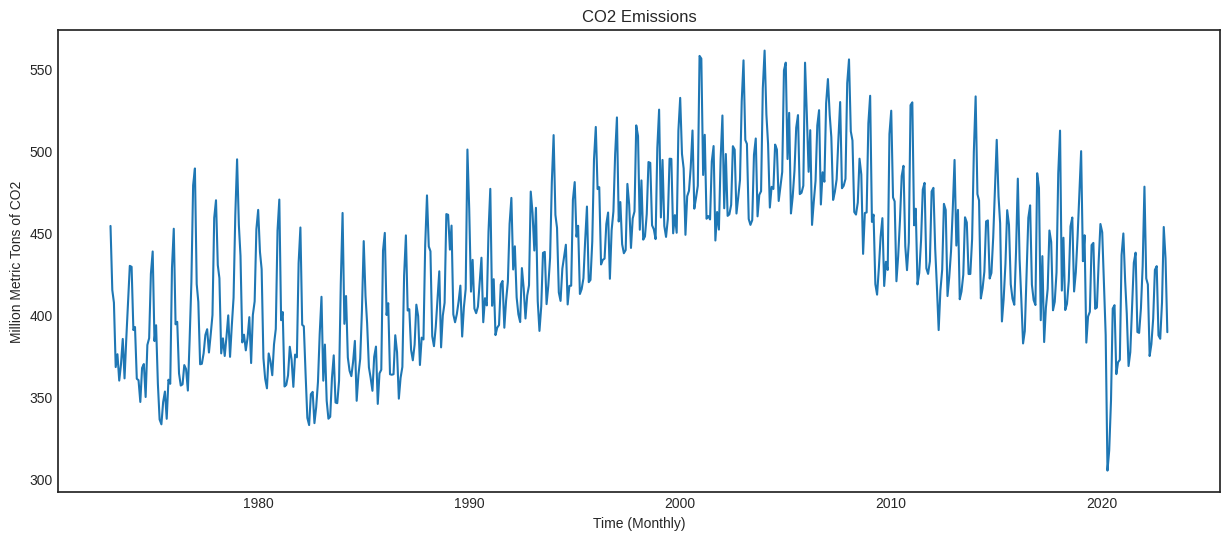

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(co2['Total'])
plt.title('CO2 Emissions')
plt.xlabel('Time (Monthly)')
plt.ylabel('Million Metric Tons of CO2')
#plt.savefig("Co2.png")
#files.download("Co2.png")

The plot does not seem to be varying too much in amplitude, meaning the variance seems fairly constant. The 2020 Covid drop is obviously preventing the variance from being completely sconstant. The mean is not constant.The trend is not super clear as it increases and decreases throughout.

Text(0, 0.5, 'Quadrillion BTU')

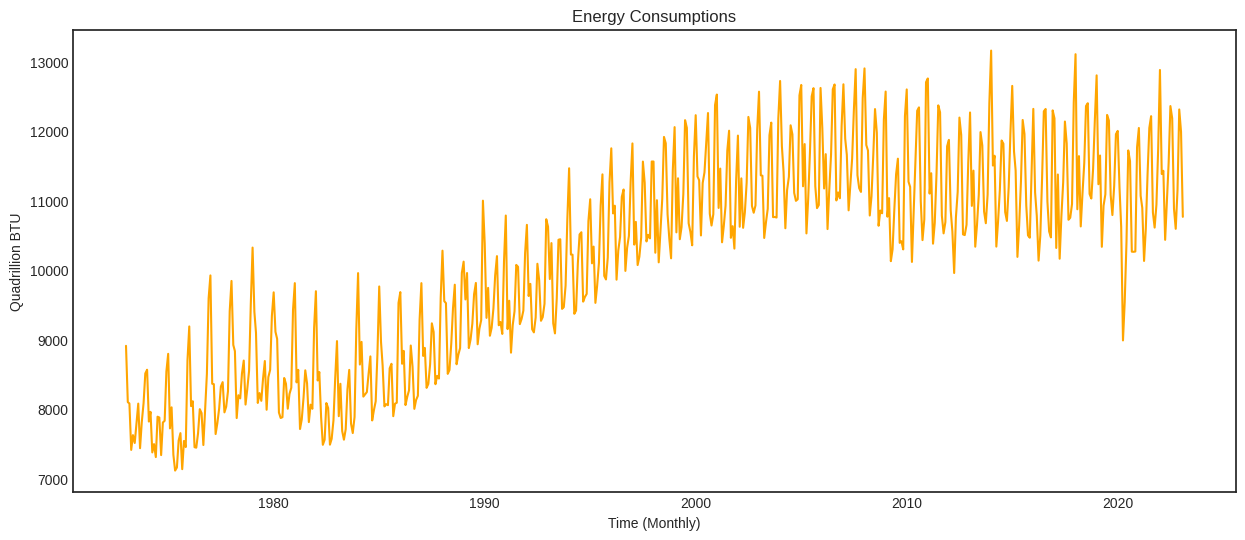

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(energy['Total'], color = 'orange')
plt.title('Energy Consumptions')
plt.xlabel('Time (Monthly)')
plt.ylabel('Quadrillion BTU')

#plt.savefig("energy.png")
#files.download("energy.png")

Energy consumption has a clear upward positive trend. The mean is not reverting. The variance seems to be fairly constant with the Covid drop preventing the variance from being constant throughout.

In [ ]:
energy.head()

Total Energy Consumed by the Residential Sector  \
Month                                                         
1973-01-01                                         1957.641   
1973-02-01                                         1712.143   
1973-03-01                                         1510.079   
1973-04-01                                         1183.421   
1973-05-01                                         1006.326   

            Total Energy Consumed by the Commercial Sector  \
Month                                                        
1973-01-01                                        1080.680   
1973-02-01                                        1003.913   
1973-03-01                                         886.420   
1973-04-01                                         736.851   
1973-05-01                                         695.636   

            Total Energy Consumed by the Industrial Sector  \
Month                                                        
1973-01-01                                        2673.882   
1973-02-01                                        2432.592   
1973-03-01                                        2561.729   
1973-04-01                                        2540.020   
1973-05-01                                        2747.831   

            Total Energy Consumed by the Transportation Sector  \
Month                                                            
1973-01-01                                           1507.977    
1973-02-01                                           1441.064    
1973-03-01                                           1564.146    
1973-04-01                                           1483.064    
1973-05-01                                           1624.965    

            Primary Energy Consumed by the Electric Power Sector     Total  
Month                                                                       
1973-01-01                                           1691.096     8911.276  
1973-02-01                                           1511.458     8101.170  
1973-03-01                                           1559.159     8081.533  
1973-04-01                                           1470.152     7413.508  
1973-05-01                                           1551.631     7626.389

In [36]:
energy.index = pd.to_datetime(energy.index)

split_date = '2021-01-01'

train_energy = energy.loc[energy.index < split_date]

test_energy = energy.loc[energy.index >= split_date]

In [37]:
co2.index = pd.to_datetime(co2.index)

split_date = '2021-01-01'

train_co2 = co2.loc[co2.index < split_date]

test_co2 = co2.loc[co2.index >= split_date]

Text(0, 0.5, 'ACF')

<Figure size 1500x600 with 0 Axes>

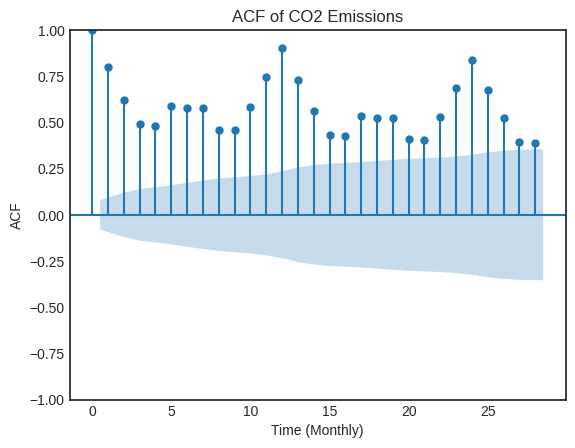

In [ ]:
plt.figure(figsize=(15,6))
plot_acf(co2['Total']);
plt.title('ACF of CO2 Emissions')
plt.xlabel('Time (Monthly)')
plt.ylabel('ACF')
#plt.savefig("Co2_ACF.png")
#files.download("Co2_ACF.png")

ACF plot appears to be decreasing with seasonality components showing through with spikes reocurring at consistent intervals as the months increase in distance.

Text(0, 0.5, 'PACF')

<Figure size 1500x600 with 0 Axes>

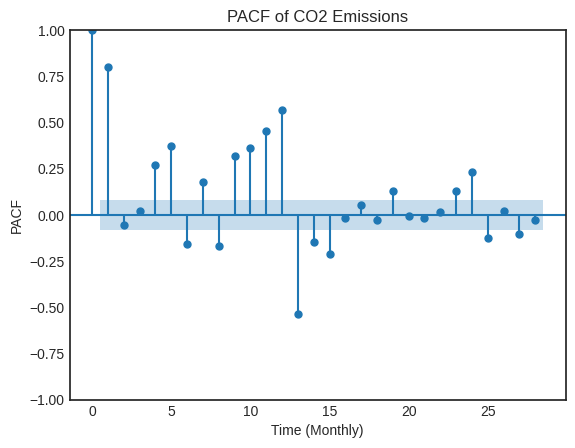

In [ ]:
plt.figure(figsize=(15,6))
plot_pacf(co2['Total']);
plt.title('PACF of CO2 Emissions')
plt.xlabel('Time (Monthly)')
plt.ylabel('PACF')
#plt.savefig("Co2_PACF.png")
#files.download("Co2_PACF.png")

PACF plot is not the cleanest. There is a spike at lag one and lag two and three are within the band. Maybe an AR(1) process could be beneficial here.

# STL Decomposition

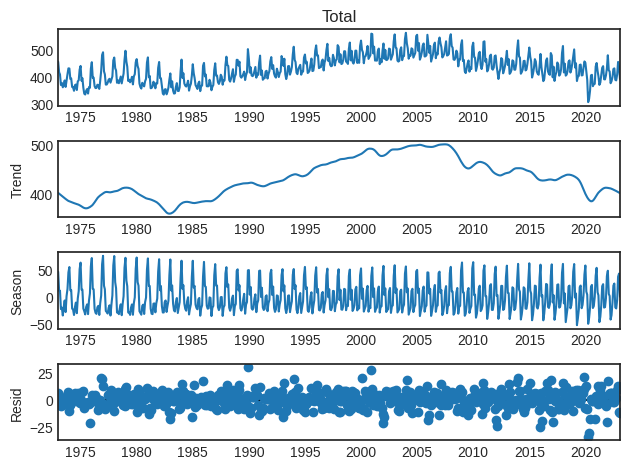

In [ ]:
stl = STL(co2['Total'])
resultsStl = stl.fit()
resultsStl.plot();

The STL decomposition reveals the trend to increase and decrease over time for CO2 emissions. It is almost parabolic. There does appear to be seasonality over time with some variance changing over time. The residuals are centered around zero and do not appear to have heteroskedasticity.

# Holt Winters

In [43]:
hw_co2 = HWES(train_co2['Total'], seasonal_periods=12, trend='mul', seasonal='add')
hw_fitted_co2 = hw_co2.fit()
co2_forecast = hw_fitted_co2.forecast(steps=26)
print(hw_fitted_co2.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    Total   No. Observations:                  576
Model:             ExponentialSmoothing   SSE                          88607.735
Optimized:                         True   AIC                           2932.659
Trend:                   Multiplicative   BIC                           3002.357
Seasonal:                      Additive   AICC                          2933.887
Seasonal Periods:                    12   Date:                 Fri, 09 Jun 2023
Box-Cox:                          False   Time:                         21:12:43
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.4334640                alpha                 True
smoothing_trend          

The AIC, BIC, and RMSE was best for a Holt-Winters model with a multiplicative trend and additive seasonal component. This is why we have chosen to stick with this Hotl-Winters model without a damp trend. 

In [44]:
hw_co2_damped = HWES(train_co2['Total'], seasonal_periods=12, trend='add', seasonal='add', damped = True)
hw_fitted_co2_damped = hw_co2_damped.fit()
co2_forecast_damped = hw_fitted_co2_damped.forecast(steps=26)
print(hw_fitted_co2_damped.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    Total   No. Observations:                  576
Model:             ExponentialSmoothing   SSE                          88611.984
Optimized:                         True   AIC                           2934.687
Trend:                         Additive   BIC                           3008.741
Seasonal:                      Additive   AICC                          2936.054
Seasonal Periods:                    12   Date:                 Fri, 09 Jun 2023
Box-Cox:                          False   Time:                         21:12:44
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.4325864                alpha                 True
smoothing_trend          

The AIC, BIC and RMSE were all lowest when the Holt-Winters model had a damped trend with an additive trend and additive seasonal component. That is how we arrived at this model as our choice.

In [45]:
# Calculate the RMSE for each method
co2_hw_RMSE = np.sqrt(mean_squared_error(test_co2['Total'], co2_forecast))
co2_hw_damped_RMSE = np.sqrt(mean_squared_error(test_co2['Total'], co2_forecast_damped))

# Compare the RMSE values
if co2_hw_RMSE < co2_hw_damped_RMSE:
    print("Holt-Winters' method without a damped trend has a lower RMSE", co2_hw_RMSE)
elif co2_hw_RMSE > co2_hw_damped_RMSE:
    print("The Holt-Winters method with a damped trend has a lower RMSE", co2_hw_damped_RMSE)
else:
    print("Both methods have the same RMSE", co2_hw_damped_RMSE)

The Holt-Winters method with a damped trend has a lower RMSE 22.550133938980228


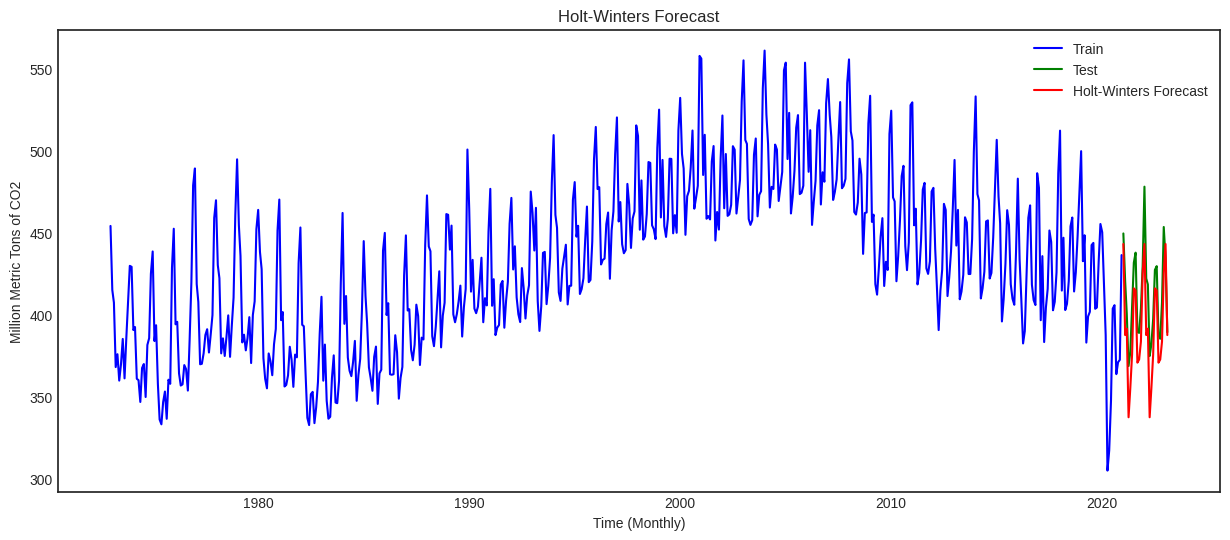

In [46]:
plt.figure(figsize=(15,6))
plt.title('Holt-Winters Forecast')
plt.xlabel('Time (Monthly)')
plt.ylabel('Million Metric Tons of CO2')
plt.plot(train_co2['Total'], label = 'Train', color = 'b')
plt.plot(test_co2['Total'], label = 'Test', color = 'g')
plt.plot(co2_forecast_damped, label = 'Holt-Winters Forecast', color = 'r')
plt.legend()

The Holt-Winters with the damped trend had the lower RMSE. This is the train and test forecast. The testing set shows CO2 to be much higher than what the Holt-Winters forecast predicts. The Covid drop really affected the Holt-Winters forecast with the big drop. The Covid drop was a major anomaly but it is clearly affecting how the model forecasts.

Text(0, 0.5, 'ACF')

<Figure size 1500x600 with 0 Axes>

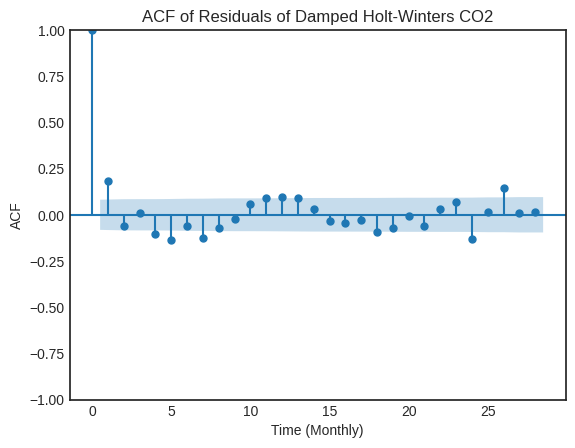

In [47]:
plt.figure(figsize=(15,6))
plot_acf(hw_fitted_co2_damped.resid)
plt.title('ACF of Residuals of Damped Holt-Winters CO2')
plt.xlabel('Time (Monthly)')
plt.ylabel('ACF')

Ther are some spikes out of the bands or on the border, but it apperas the ACF plot is close to representing white noise which is good.

Text(0, 0.5, 'PACF')

<Figure size 1500x600 with 0 Axes>

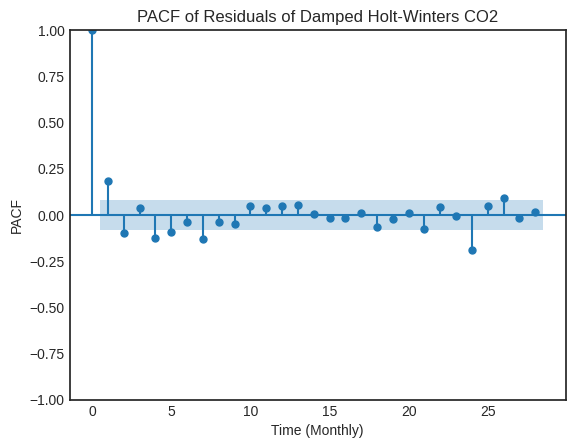

In [48]:
plt.figure(figsize=(15,6))
plot_pacf(hw_fitted_co2_damped.resid)
plt.title('PACF of Residuals of Damped Holt-Winters CO2')
plt.xlabel('Time (Monthly)')
plt.ylabel('PACF')

Again, there are some spikes outside the bands. Some more work may need to be done to the Holt-Winters model before it is perfect, but the white noise could be taken care of.

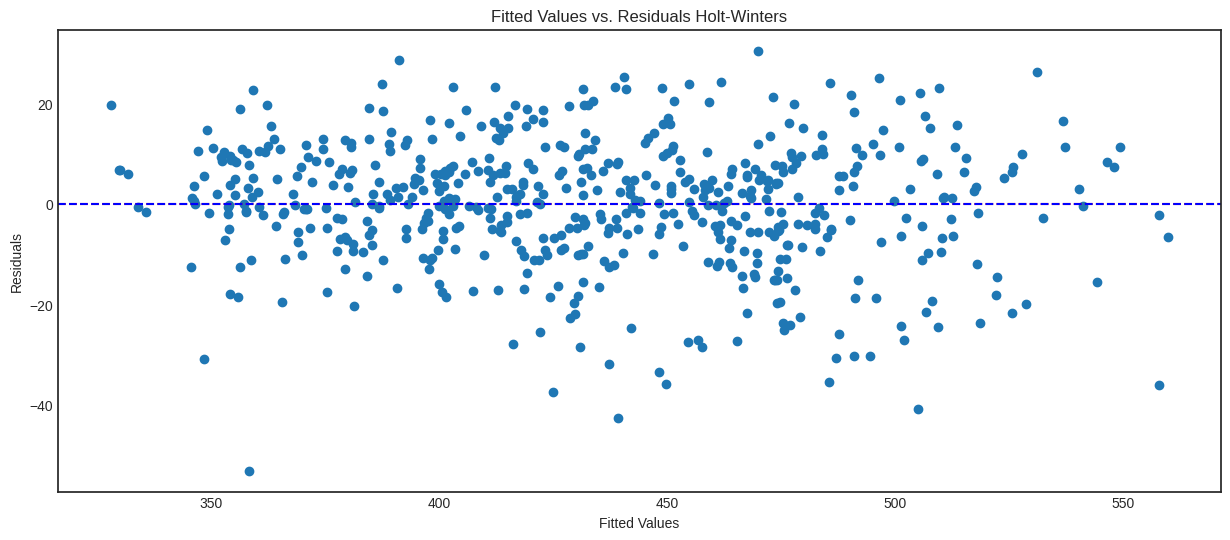

In [49]:
plt.figure(figsize=(15,6))
plt.scatter(hw_fitted_co2_damped.fittedvalues, hw_fitted_co2_damped.resid)

plt.axhline(y=0, color='red', linestyle='--')

mean_residuals = sum(hw_fitted_co2_damped.resid) / len(hw_fitted_co2_damped.resid)
plt.axhline(y=mean_residuals, color='blue', linestyle='--')

plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Fitted Values vs. Residuals Holt-Winters')

# Display the plot
plt.show()

Residuals look centered around zero and do not appear to have heteroskedasticity.

# ETS

In [50]:
train_co2.index.freq = pd.infer_freq(train_co2.index)
test_co2.index.freq = pd.infer_freq(test_co2.index)

In [51]:
ets_co2=sm.tsa.statespace.ExponentialSmoothing(train_co2['Total'],
                                           trend=True, 
                                           initialization_method= 'heuristic', 
                                           seasonal=12, 
                                           damped_trend=False).fit()
fc_co2 = ets_co2.forecast(26)
ets_co2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Exponential Smoothing Results                         
==============================================================================
Dep. Variable:                  Total   No. Observations:                  576
Model:                   ETS(A, A, A)   Log Likelihood               -2273.292
Date:                Fri, 09 Jun 2023   AIC                           4554.584
Time:                        21:12:55   BIC                           4572.009
Sample:                    01-01-1973   HQIC                          4561.380
                         - 12-01-2020   Scale                          156.883
Covariance Type:                  opg                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
smoothing_level        0.4035      0.025     16.163      0.000       0.355       0.452
smoothing_trend        0.0032      0.002      1.518      0.129      -0.001       0.007
smoothing_seasonal     0.2277      0.020     11.159      0.000       0.188       0.268
=============================================
             initialization method: heuristic
---------------------------------------------
level                                392.3283
trend                                 -1.0331
seasonal                              56.3623
seasonal.L1                            8.9871
seasonal.L2                           -6.1429
seasonal.L3                          -33.5739
seasonal.L4                          -15.1059
seasonal.L5                          -20.1978
seasonal.L6                          -31.6808
seasonal.L7                          -29.1929
seasonal.L8                          -21.8482
seasonal.L9                           12.4607
seasonal.L10                          12.1542
seasonal.L11                          67.7780
===================================================================================
Ljung-Box (L1) (Q):                  24.41   Jarque-Bera (JB):                45.17
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.58   Skew:                            -0.53
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [52]:
ets_co2_damped=sm.tsa.statespace.ExponentialSmoothing(train_co2['Total'],
                                           trend=True, 
                                           initialization_method= 'heuristic', 
                                           seasonal=12, 
                                           damped_trend=True).fit()
fc_co2_damped = ets_co2_damped.forecast(26)
ets_co2_damped.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Exponential Smoothing Results                         
==============================================================================
Dep. Variable:                  Total   No. Observations:                  576
Model:                  ETS(A, Ad, A)   Log Likelihood               -2270.149
Date:                Fri, 09 Jun 2023   AIC                           4550.298
Time:                        21:12:57   BIC                           4572.078
Sample:                    01-01-1973   HQIC                          4558.792
                         - 12-01-2020   Scale                          155.180
Covariance Type:                  opg                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
smoothing_level        0.3992      0.029     13.619      0.000       0.342       0.457
smoothing_trend        0.0001      0.009      0.011      0.991      -0.018       0.018
smoothing_seasonal     0.2278      0.021     11.004      0.000       0.187       0.268
damping_trend          0.9241      0.266      3.472      0.001       0.403       1.446
=============================================
             initialization method: heuristic
---------------------------------------------
level                                392.3283
trend                                 -1.0331
seasonal                              56.3623
seasonal.L1                            8.9871
seasonal.L2                           -6.1429
seasonal.L3                          -33.5739
seasonal.L4                          -15.1059
seasonal.L5                          -20.1978
seasonal.L6                          -31.6808
seasonal.L7                          -29.1929
seasonal.L8                          -21.8482
seasonal.L9                           12.4607
seasonal.L10                          12.1542
seasonal.L11                          67.7780
===================================================================================
Ljung-Box (L1) (Q):                  24.03   Jarque-Bera (JB):                47.47
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.61   Skew:                            -0.55
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

The lags appear to have similar numbers between the two models, but the damped trend model has a lower BIC while the non-damped trend has a lower AIC.

In [53]:
# Calculate the RMSE for each method
co2_ets_RMSE = np.sqrt(mean_squared_error(test_co2['Total'], fc_co2))
co2_ets_damped_RMSE = np.sqrt(mean_squared_error(test_co2['Total'], fc_co2_damped))

# Compare the RMSE values
if co2_ets_RMSE < co2_ets_damped_RMSE:
    print("ETS method without a damped trend has a lower RMSE", co2_ets_RMSE)
elif co2_ets_RMSE > co2_ets_damped_RMSE:
    print("The ETS method with a damped trend has a lower RMSE", co2_ets_damped_RMSE)
else:
    print("Both methods have the same RMSE", co2_ets_RMSE)

The ETS method with a damped trend has a lower RMSE 23.58730822705725


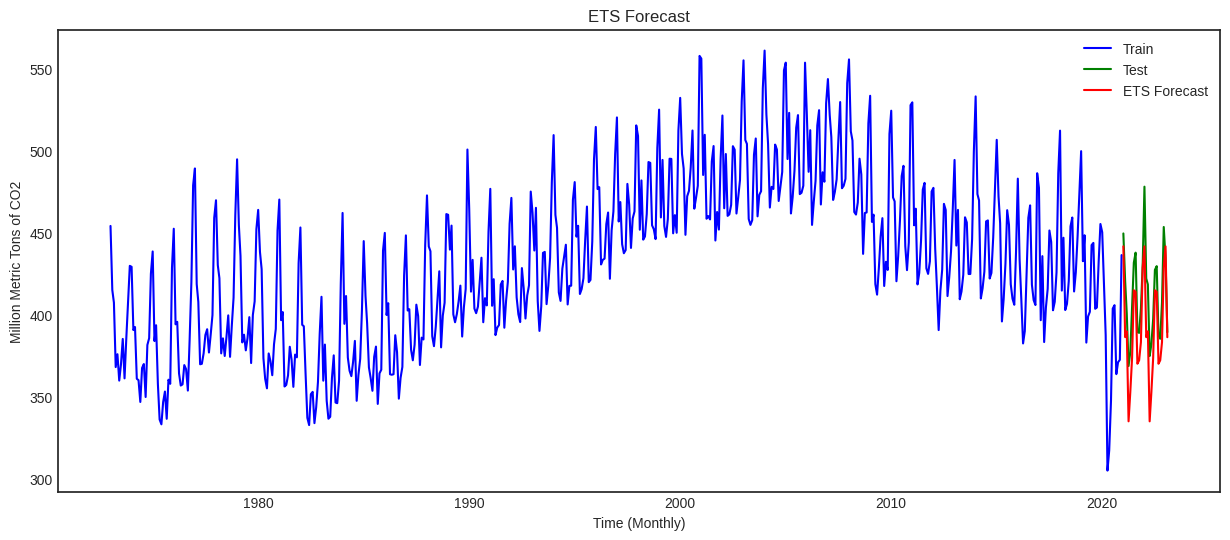

In [ ]:
plt.figure(figsize=(15,6))
plt.title('ETS Forecast')
plt.xlabel('Time (Monthly)')
plt.ylabel('Million Metric Tons of CO2')
plt.plot(train_co2['Total'], label = 'Train', color = 'b')
plt.plot(test_co2['Total'], label = 'Test', color = 'g')
plt.plot(fc_co2_damped, label = 'ETS Forecast', color = 'r')
plt.legend()

Similar to the Holt-Winters forecast, the ETS forecast has large drawdowns because of the Covid anamoly. The true forecast has higher CO2 emissions as the world started to get back to normal.

Text(0, 0.5, 'ACF')

<Figure size 1500x600 with 0 Axes>

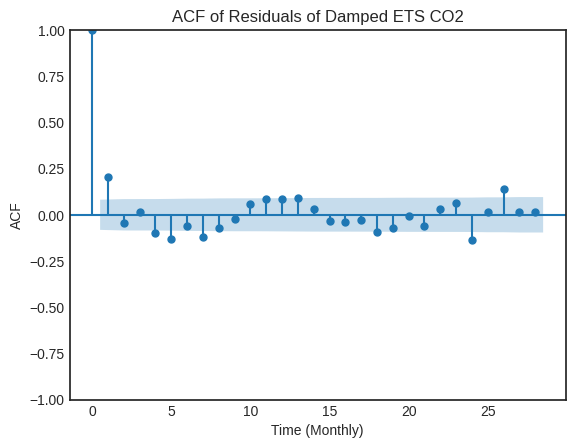

In [ ]:
plt.figure(figsize=(15,6))
plot_acf(ets_co2_damped.resid)
plt.title('ACF of Residuals of Damped ETS CO2')
plt.xlabel('Time (Monthly)')
plt.ylabel('ACF')

There are some spikes on the border or outside the border, but the ACF plot looks relatively clean and the white noise taken care of.

Text(0, 0.5, 'PACF')

<Figure size 1500x600 with 0 Axes>

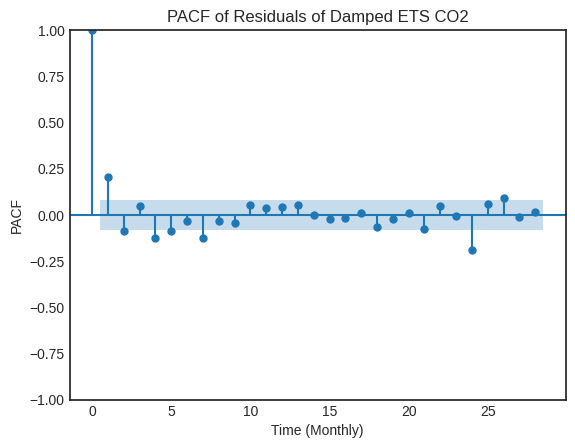

In [ ]:
plt.figure(figsize=(15,6))
plot_pacf(ets_co2_damped.resid)
plt.title('PACF of Residuals of Damped ETS CO2')
plt.xlabel('Time (Monthly)')
plt.ylabel('PACF')

The PACF plot has some spikes outside the zone, but it appears the white noise is good.

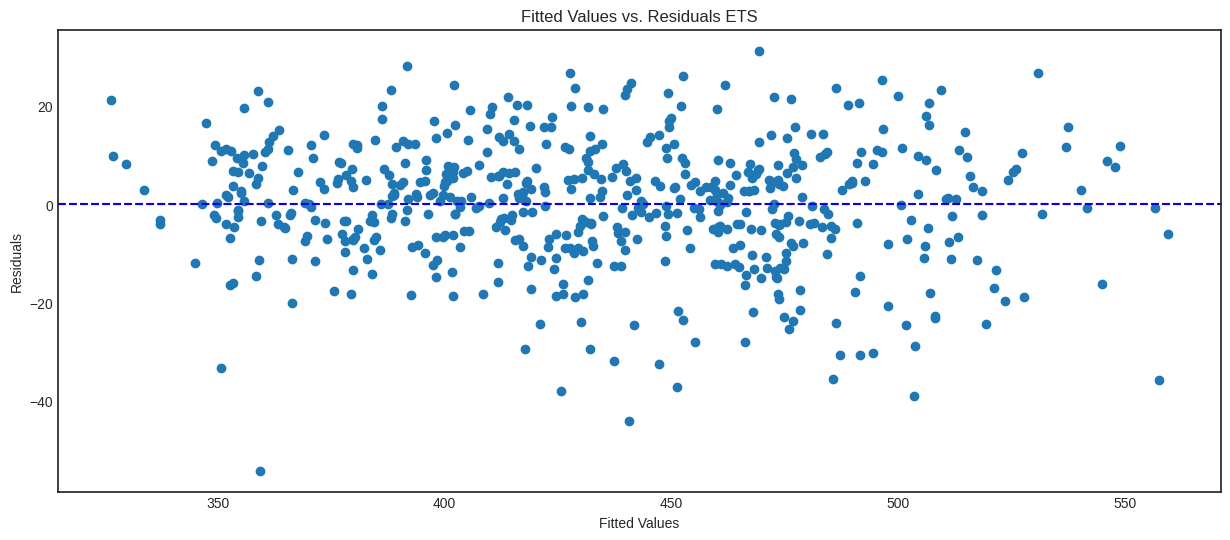

In [ ]:
plt.figure(figsize=(15,6))
plt.scatter(ets_co2_damped.fittedvalues, ets_co2_damped.resid)

plt.axhline(y=0, color='red', linestyle='--')

mean_residuals = sum(ets_co2_damped.resid) / len(ets_co2_damped.resid)
plt.axhline(y=mean_residuals, color='blue', linestyle='--')

plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Fitted Values vs. Residuals ETS')

# Display the plot
plt.show()

The residuals are clustered around zero and heteroskedasticity does not appear to be present so the residual plot is good.

# Box-Cox ETS

In [39]:
bc_co2, lambda_ = stats.boxcox(co2["Total"])
print(lambda_)

0.24642873746035018


A box-cox transformation is needed and a log transformation could be best since the lambda is quite low.

In [40]:
co2_2 = co2.copy()
#co2_2.set_index(co2_2.columns[0], inplace=True)
co2_2['bc_total'] = bc_co2
co2_2 = co2_2[['bc_total']]
co2_2.head()

bc_total
Month                
1973-01-01  14.269468
1973-02-01  13.868561
1973-03-01  13.786305
1973-04-01  13.346746
1973-05-01  13.437151

In [41]:
co2_2.index = pd.to_datetime(co2_2.index)
split_date = '2021-01-01'
train_co2_2= co2_2.loc[co2_2.index < split_date]
test_co2_2 = co2_2.loc[co2_2.index >= split_date]

In [ ]:
test_co2_2.head()

bc_total
Month                
2021-01-01  14.223870
2021-02-01  13.925729
2021-03-01  13.713649
2021-04-01  13.354219
2021-05-01  13.451716

We transformated the dataset

In [ ]:
train_co2_2.index.freq = pd.infer_freq(train_co2_2.index)
test_co2_2.index.freq = pd.infer_freq(test_co2_2.index)
ets_bc = sm.tsa.statespace.ExponentialSmoothing(train_co2_2,
                                           trend=True, 
                                           initialization_method= 'heuristic', 
                                           seasonal=12, 
                                           damped_trend=False).fit()
fc_ets_bc = ets_bc.forecast(len(test_co2_2))

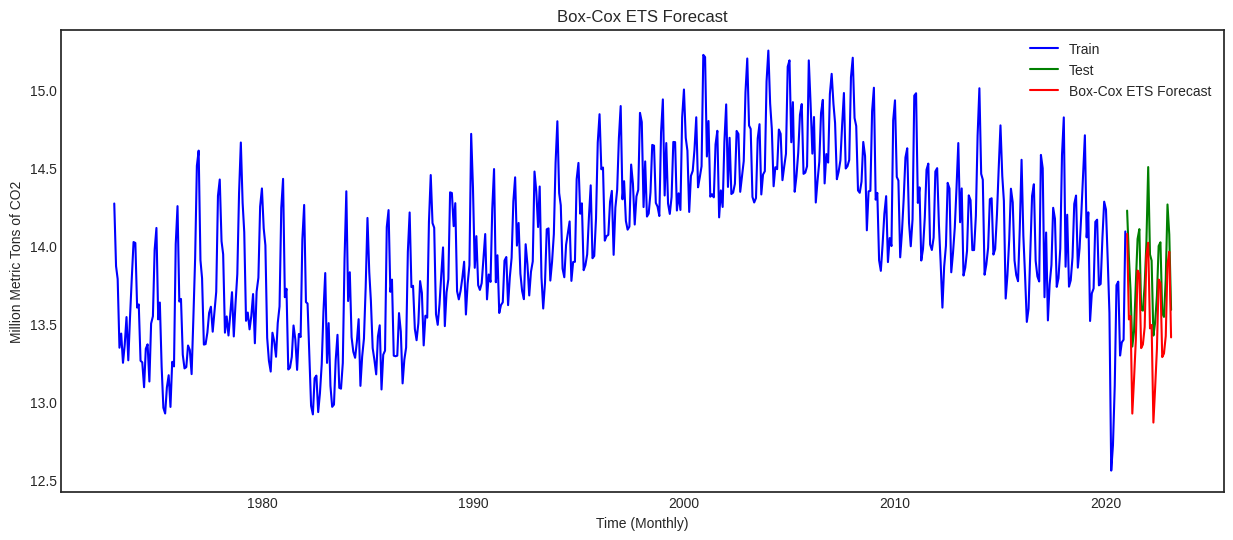

In [ ]:
plt.figure(figsize = (15,6))
plt.plot(train_co2_2.index, train_co2_2['bc_total'], label='Train', color = 'b')
plt.plot(test_co2_2.index, test_co2_2['bc_total'], label='Test', color = 'g')
plt.plot(fc_ets_bc.index, fc_ets_bc, label='Box-Cox ETS Forecast', color = 'r')
plt.legend(loc='best')
plt.title("Box-Cox ETS Forecast")
plt.xlabel('Time (Monthly)')
plt.ylabel('Million Metric Tons of CO2')
plt.show()

This forecast is with the box-cox transformation. It appears to do well even with smaller units The actual test set reveals CO2 emissions to be higher than the predicted forecast.

In [ ]:
ets_bc_RMSE = np.sqrt(mean_squared_error(test_co2_2['bc_total'], fc_ets_bc))
ets_bc_RMSE

0.3238095339673405

The RMSE is quite low compared to the other RMSEs because this forecast is not using the original units which are much bigger. We convert the box-cox transformed data back into the original units.

In [ ]:
####Convert to original units
from scipy.special import inv_boxcox
original = inv_boxcox(fc_ets_bc, 0.24642873746035018)
original

2021-01-01    434.918944
2021-02-01    383.997557
2021-03-01    385.945416
2021-04-01    333.337278
2021-05-01    351.411981
2021-06-01    372.443889
2021-07-01    412.471833
2021-08-01    410.237722
2021-09-01    367.977711
2021-10-01    369.959777
2021-11-01    379.693970
2021-12-01    421.579495
2022-01-01    429.349383
2022-02-01    378.927622
2022-03-01    380.856082
2022-04-01    328.780873
2022-05-01    346.670294
2022-06-01    367.489526
2022-07-01    407.120640
2022-08-01    404.908420
2022-09-01    363.068258
2022-10-01    365.030377
2022-11-01    374.666983
2022-12-01    416.139358
2023-01-01    423.833739
2023-02-01    373.908296
Freq: MS, Name: predicted_mean, dtype: float64

In [ ]:
#### Calculate RMSE of the original units
rmse_ori = np.sqrt(mean_squared_error(test_co2['Total'], original))
rmse_ori

29.187865220384655

The RMSE is quite high compared to the other RMSEs once the original units are established.

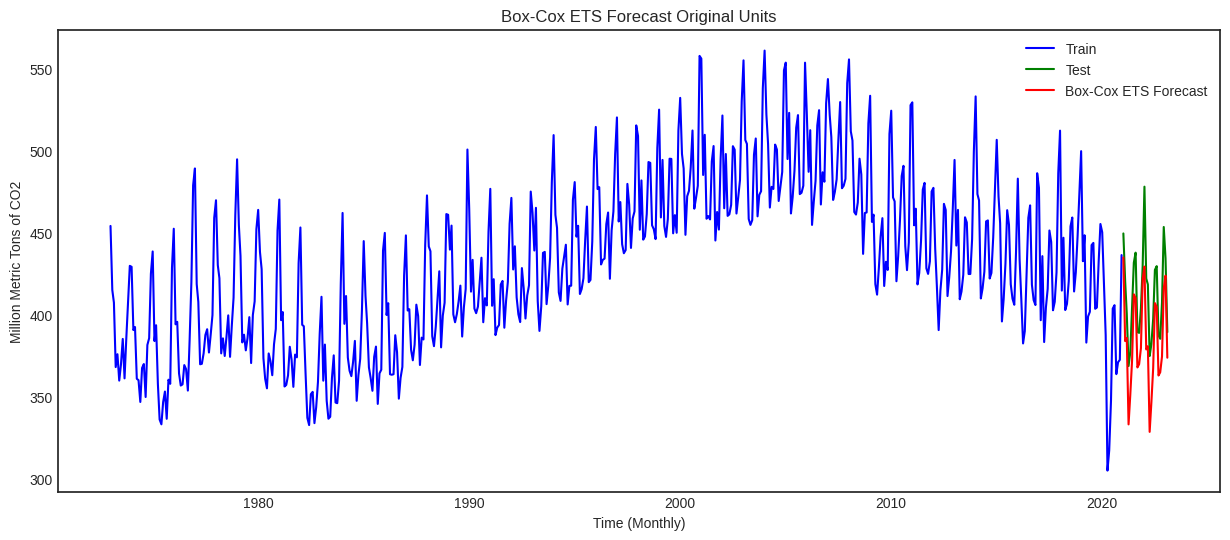

In [ ]:
###plot original unit of boxcox model
plt.figure(figsize = (15,6))
plt.plot(train_co2_2.index, train_co2['Total'], label='Train', color = 'b')
plt.plot(test_co2_2.index, test_co2['Total'], label='Test', color = 'g')
plt.plot(fc_ets_bc.index, original, label='Box-Cox ETS Forecast', color = 'r')
plt.legend(loc='best')
plt.title("Box-Cox ETS Forecast Original Units")
plt.xlabel('Time (Monthly)')
plt.ylabel('Million Metric Tons of CO2')
plt.show()

The forecast look pretty similar to the forecast using transformed data. It resembles the test data, however, the magnitude is lower.

In [ ]:
ets_bc_res = ets_bc.resid

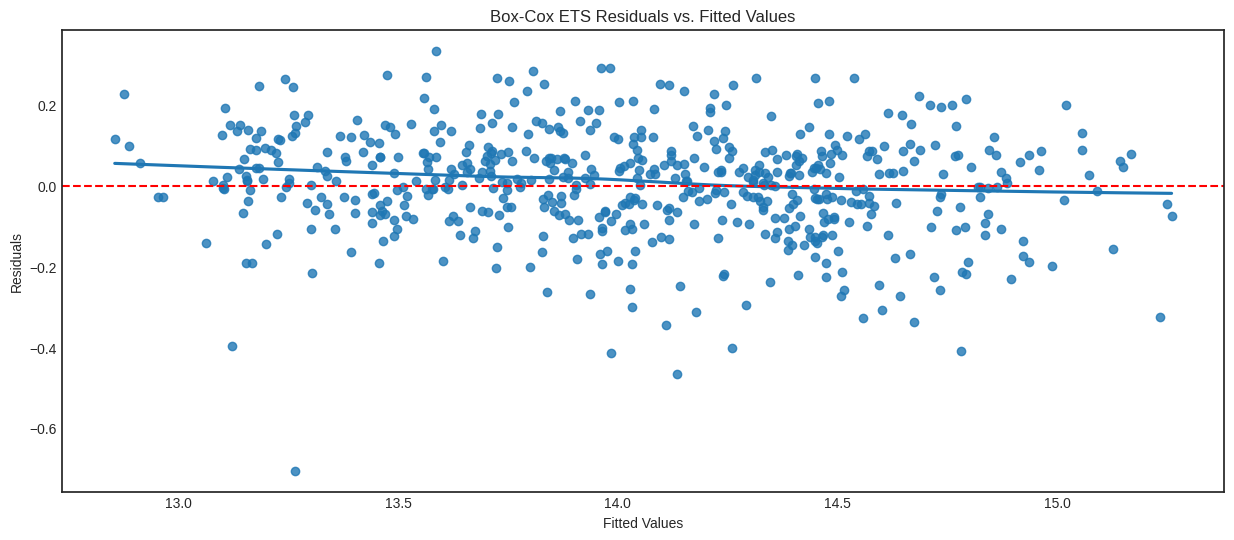

In [ ]:
plt.figure(figsize = (15, 6))
plt.title('Box-Cox ETS Residuals vs. Fitted Values')
sns.regplot(x = ets_bc.fittedvalues, y = ets_bc_res, lowess = True)
plt.ylabel('Residuals')
plt.xlabel('Fitted Values')
plt.axhline(0, linestyle = '--', color = 'red')

The residuals seem scattered around zero. The regression line is slightly decreasing.

Text(0, 0.5, 'ACF')

<Figure size 1500x600 with 0 Axes>

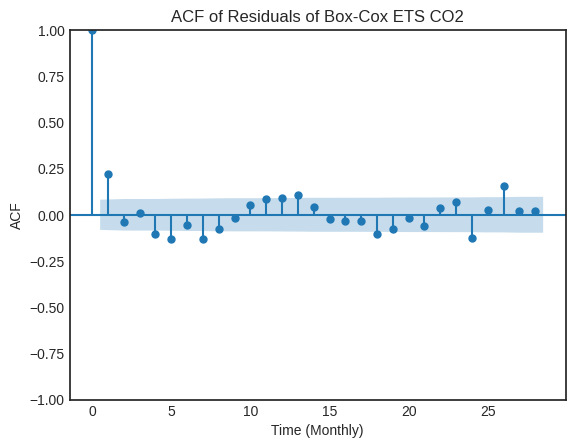

In [ ]:
plt.figure(figsize=(15,6))
plot_acf(ets_bc_res)
plt.title('ACF of Residuals of Box-Cox ETS CO2')
plt.xlabel('Time (Monthly)')
plt.ylabel('ACF')

The ACF plot has some spikes outside the boundaries, but residuals  resemble might anyway white noise with some seasonality.

Text(0, 0.5, 'PACF')

<Figure size 1500x600 with 0 Axes>

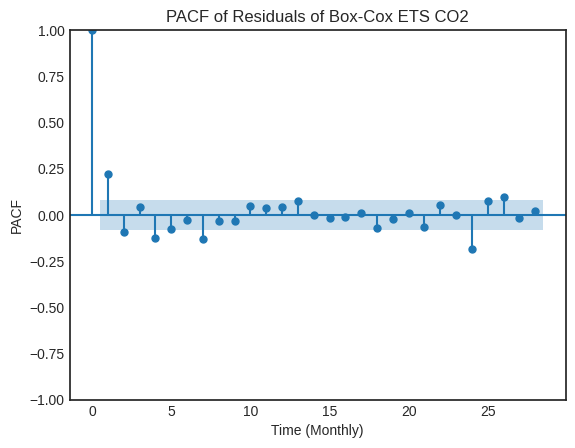

In [ ]:
plt.figure(figsize=(15,6))
plot_pacf(ets_bc_res)
plt.title('PACF of Residuals of Box-Cox ETS CO2')
plt.xlabel('Time (Monthly)')
plt.ylabel('PACF')

The PACF plot has some spikes outside the zone, but it appears the white noise is good.

# Season AR model

We first tried to fit the Seasonal AR1 model since the ACF plot of the original time series data decays over time with monthly periodicity, while there is a cutoff at lag 2 in the PACF plot. 

In [ ]:
sar1_fitted_co2 = ARIMA(train_co2['Total'], order=(1, 0, 0), seasonal_order=(0, 0, 0, 12)
              ).fit()
print(sar1_fitted_co2.summary())

                               SARIMAX Results                                
Dep. Variable:                  Total   No. Observations:                  576
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -2769.099
Date:                Fri, 09 Jun 2023   AIC                           5544.198
Time:                        07:23:41   BIC                           5557.266
Sample:                    01-01-1973   HQIC                          5549.294
                         - 12-01-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        433.0919      6.608     65.541      0.000     420.141     446.043
ar.L1          0.8041      0.027     29.777      0.000       0.751       0.857
sigma2       875.8395     53.207     16.461      0.0

In [ ]:
# Calculate the forcast for the Seasonal AR1 model
fc_co2_sar1 = sar1_fitted_co2.forecast(26)

# Calculate the RMSE for the Seasonal AR1 model
co2_sar1_RMSE = np.sqrt(mean_squared_error(test_co2['Total'], fc_co2_sar1))

print('RMSE for the Seasonal AR1 model is:', co2_sar1_RMSE )

RMSE for the Seasonal AR1 model is: 34.94584250078047


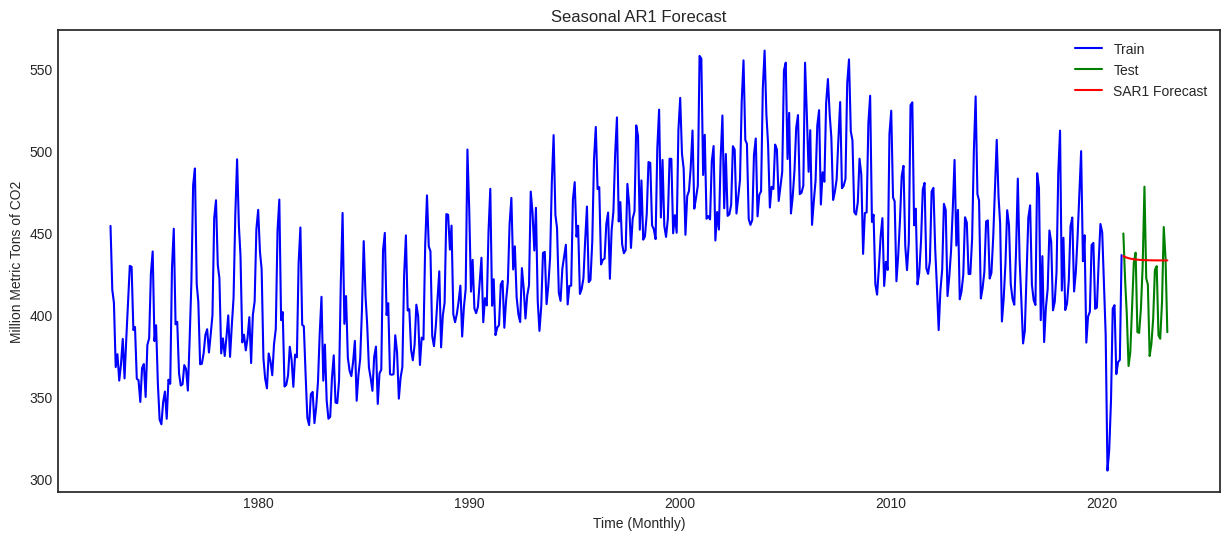

In [ ]:
plt.figure(figsize=(15,6))
plt.title('Seasonal AR1 Forecast')
plt.xlabel('Time (Monthly)')
plt.ylabel('Million Metric Tons of CO2')
plt.plot(train_co2['Total'], label = 'Train', color = 'b')
plt.plot(test_co2['Total'], label = 'Test', color = 'g')
plt.plot(fc_co2_sar1, label = 'SAR1 Forecast', color = 'r')
plt.legend()

The forecast of the Seasonal AR1 model fails to capture neither seasonality nor the overall patterns, and it performs poorly. 

Text(0, 0.5, 'ACF')

<Figure size 1500x600 with 0 Axes>

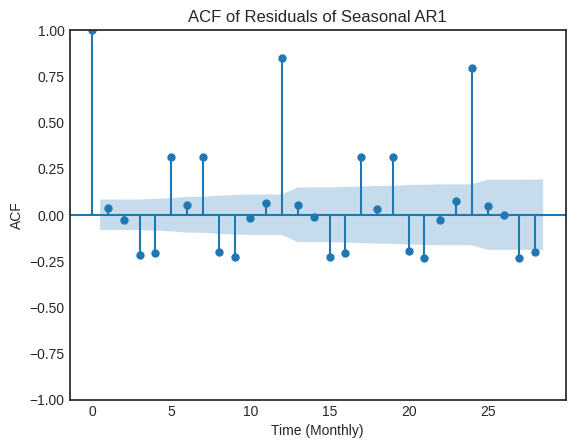

In [ ]:
plt.figure(figsize=(15,6))
plot_acf(sar1_fitted_co2.resid[12:])
plt.title('ACF of Residuals of Seasonal AR1')
plt.xlabel('Time (Monthly)')
plt.ylabel('ACF')

Text(0, 0.5, 'PACF')

<Figure size 1500x600 with 0 Axes>

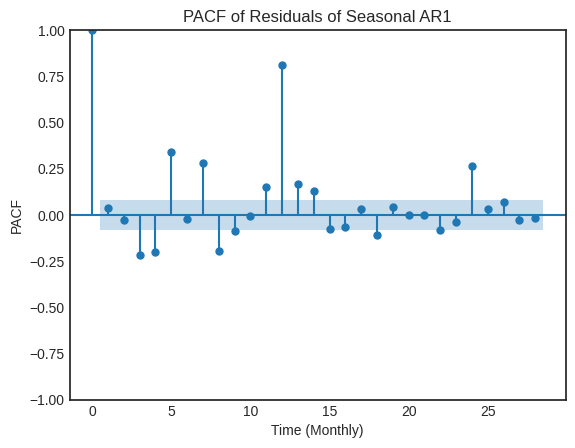

In [ ]:
plt.figure(figsize=(15,6))
plot_pacf(sar1_fitted_co2.resid[12:])
plt.title('PACF of Residuals of Seasonal AR1')
plt.xlabel('Time (Monthly)')
plt.ylabel('PACF')

There are multiple significant spikes in both the ACF and PACF plots, indicating that the Seasonal AR1 performs poorly and that more work need to be done. 

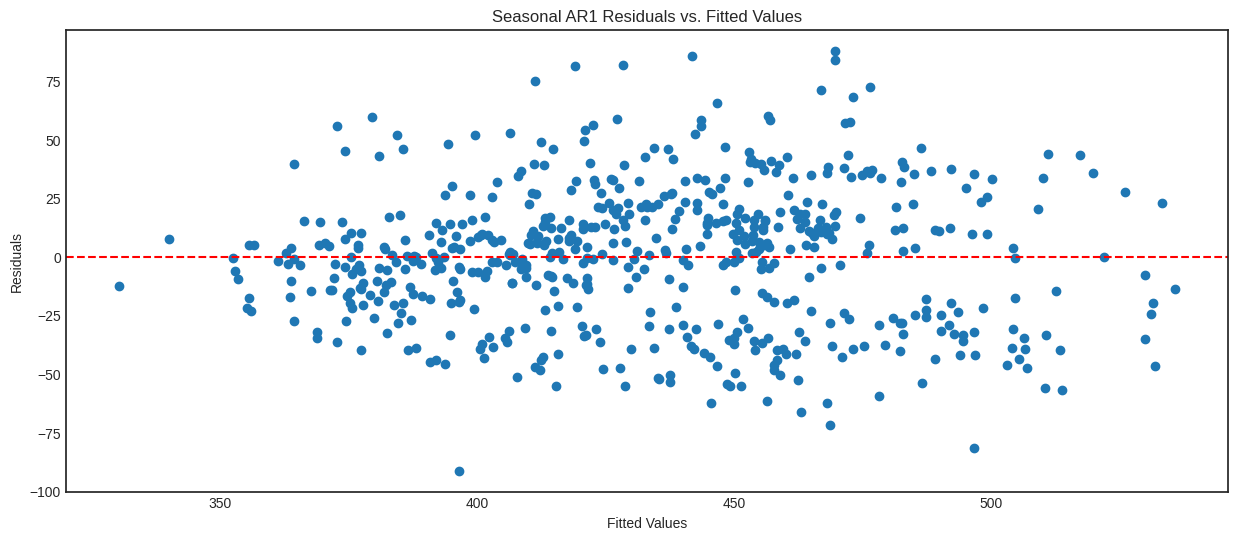

In [ ]:
plt.figure(figsize = (15, 6))
plt.title('Seasonal AR1 Residuals vs. Fitted Values')
plt.scatter(x = sar1_fitted_co2.fittedvalues, y = sar1_fitted_co2.resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

Heteroskedasticity seems to present in the residuals of the Seasonal AR1. Based on the outputs of ACF, PACF and the residuals, the performance of the Seasonal AR1 is not good. Thus, we need to use auto-arima function to get the best ARIMA model. 

# Seasonal ARIMA model

In [ ]:
# Select ARIMA model using the auto-arima function
sarima = pm.auto_arima(train_co2['Total'], start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=4433.914, Time=1.24 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=4967.830, Time=0.05 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=4587.805, Time=0.81 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=4699.167, Time=0.77 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=4965.920, Time=0.04 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=4622.153, Time=0.30 sec
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=4430.438, Time=1.56 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=4562.711, Time=1.02 sec
 ARIMA(1,0,1)(2,1,1)[12] intercept   : AIC=4415.205, Time=5.18 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=4503.287, Time=3.12 sec
 ARIMA(1,0,1)(2,1,2)[12] intercept   : AIC=4408.866, Time=6.20 sec
 ARIMA(1,0,1)(1,1,2)[12] intercept   : AIC=4426.268, Time=5.30 sec
 ARIMA(0,0,1)(2,1,2)[12] intercept   : AIC=4694.152, Time=3.86 sec
 ARIMA(1,0,0)(2,1,2)[12] intercept   : AIC=4461.384, Time=4.19 sec
 ARIMA(2,0,1)(2,1,2

KeyboardInterrupt: ignored

The best model selected by the auto-arima function is the Seasonal ARIMA function with autoregressive (AR) component of order 1, no differencing (d=0), a moving average (MA) component of order 2, a seasonal autoregressive (SAR) component of order 2, seasonal differencing (D=1), seasonal moving average (SMA) component of order 2, and a seasonal cycle of length 12. 

In [54]:
# Fit the Seasonal ARIMA model using the orders selected by the auto-arima function
sarima_fitted_co2 = ARIMA(train_co2['Total'], order=(1, 0, 2), seasonal_order=(2, 1, 2, 12)
              ).fit()
print(sarima_fitted_co2.summary())

                                    SARIMAX Results                                     
Dep. Variable:                            Total   No. Observations:                  576
Model:             ARIMA(1, 0, 2)x(2, 1, 2, 12)   Log Likelihood               -2190.242
Date:                          Fri, 09 Jun 2023   AIC                           4396.485
Time:                                  21:13:38   BIC                           4431.165
Sample:                              01-01-1973   HQIC                          4410.022
                                   - 12-01-2020                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9806      0.010     96.236      0.000       0.961       1.001
ma.L1         -0.3797      0.038    -10.040      0.

In [55]:
# Calculate the forcast for the Seasonal ARIMA model
fc_co2_sarima = sarima_fitted_co2.forecast(26)

# Calculate the RMSE for the Seasonal ARIMA model
co2_sarima_RMSE = np.sqrt(mean_squared_error(test_co2['Total'], fc_co2_sarima))

print('RMSE for the Seasonal ARIMA model is:', co2_sarima_RMSE )

RMSE for the Seasonal ARIMA model is: 22.523842402334527


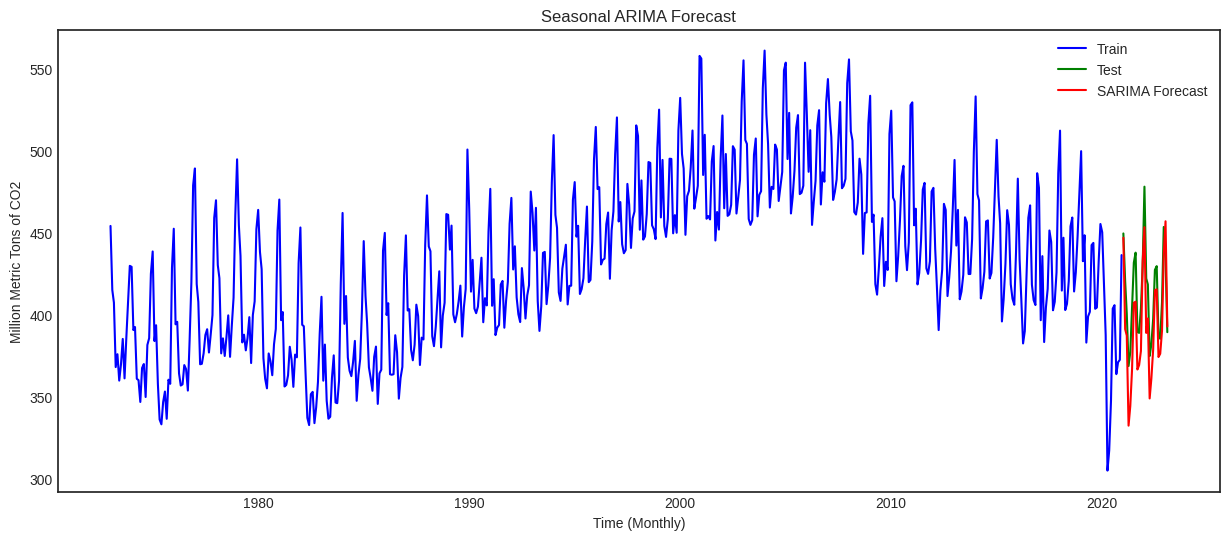

In [56]:
plt.figure(figsize=(15,6))
plt.title('Seasonal ARIMA Forecast')
plt.xlabel('Time (Monthly)')
plt.ylabel('Million Metric Tons of CO2')
plt.plot(train_co2['Total'], label = 'Train', color = 'b')
plt.plot(test_co2['Total'], label = 'Test', color = 'g')
plt.plot(fc_co2_sarima, label = 'SARIMA Forecast', color = 'r')
plt.legend()

The forecast seems to be a little bit lower than the testing set, and the amplitude of the forecast seems to be larger than the testing set, which might be due to the abrupt and huge decrease in the COVID period. However, our forecast is able to capture the overall pattern. 

Text(0, 0.5, 'ACF')

<Figure size 1500x600 with 0 Axes>

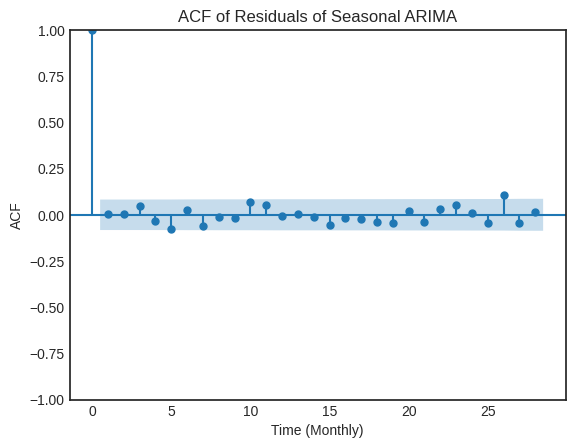

In [ ]:
plt.figure(figsize=(15,6))
plot_acf(sarima_fitted_co2.resid[12:])
plt.title('ACF of Residuals of Seasonal ARIMA')
plt.xlabel('Time (Monthly)')
plt.ylabel('ACF')
#plt.savefig("ACF_ARIMA_Resid.png")
#files.download("ACF_ARIMA_Resid.png")

The majority of spikes are inside the bands after the first 12 residuals being removed. Thus, the ACF plot shows that the residulals should be white noise.

Text(0, 0.5, 'PACF')

<Figure size 1500x600 with 0 Axes>

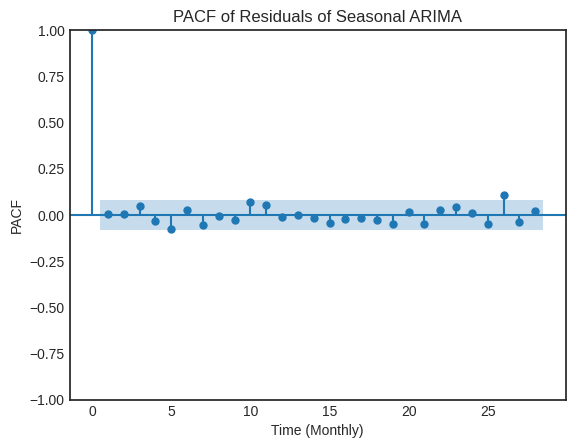

In [ ]:
plt.figure(figsize=(15,6))
plot_pacf(sarima_fitted_co2.resid[12:])
plt.title('PACF of Residuals of Seasonal ARIMA')
plt.xlabel('Time (Monthly)')
plt.ylabel('PACF')
#plt.savefig("PACF_ARIMA_Resid.png")
#files.download("PACF_ARIMA_Resid.png")

Agian since most of the spliks are inside the bands after the first 12 residuals being removed, we can conclude that the PACF shows that the residuals of the Seasonal ARIMA model should be white noise. 

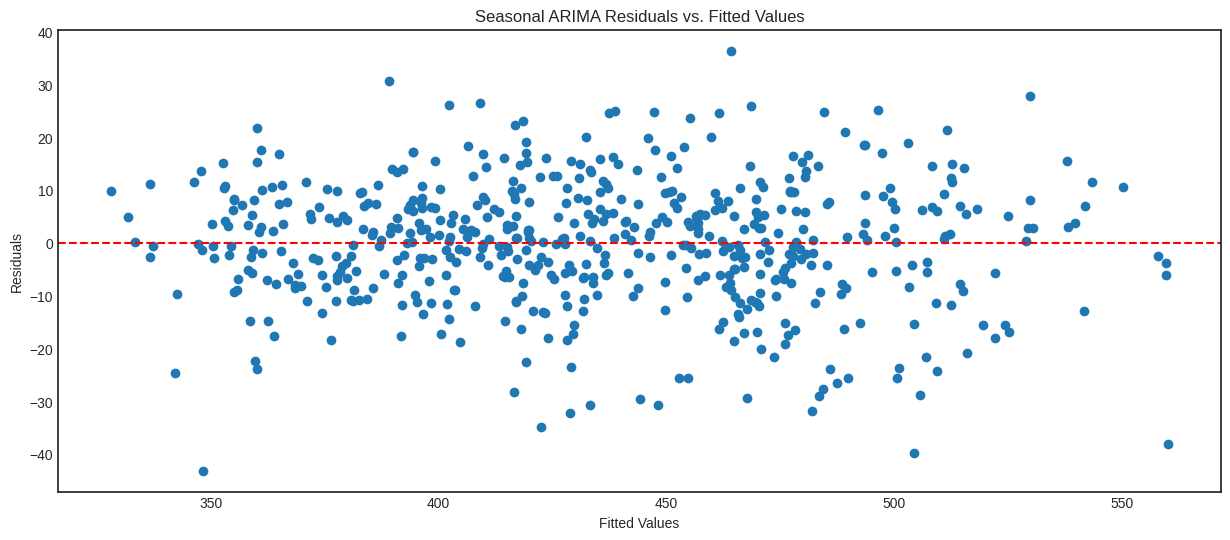

In [ ]:
Seasonal_ARIMA_fitted = sarima_fitted_co2.fittedvalues[12:]
Seasonal_ARIMA_residuals = sarima_fitted_co2.resid[12:]

plt.figure(figsize = (15, 6))
plt.title('Seasonal ARIMA Residuals vs. Fitted Values')
plt.scatter(x = Seasonal_ARIMA_fitted, y = Seasonal_ARIMA_residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()
#plt.savefig("ARIMA_Resid_FittedValues.png")
#files.download("ARIMA_Resid_FittedValues.png")

Residuals of Seasonal ARIMA model (without the first 12 residuals) appear to center around zero without heteroskedasticity.

# Garch

In [ ]:
square = np.square(sarima_fitted_co2.resid[12:])

Text(0, 0.5, 'ACF')

<Figure size 1500x600 with 0 Axes>

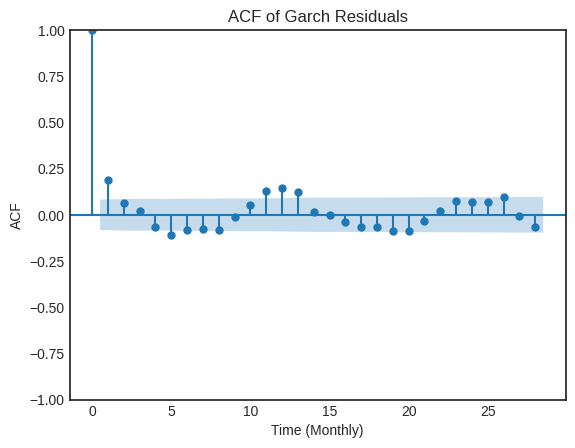

In [ ]:
plt.figure(figsize=(15,6))
plot_acf(square);
plt.title('ACF of Garch Residuals')
plt.xlabel('Time (Monthly)')
plt.ylabel('ACF')

Text(0, 0.5, 'PACF')

<Figure size 1500x600 with 0 Axes>

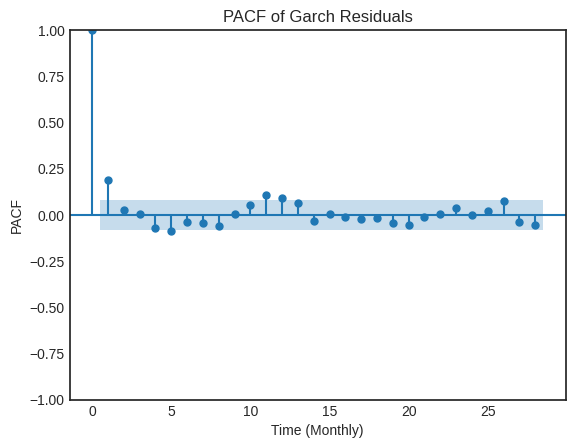

In [ ]:
plt.figure(figsize=(15,6))
plot_pacf(square);
plt.title('PACF of Garch Residuals')
plt.xlabel('Time (Monthly)')
plt.ylabel('PACF')

We first squared the residuals of the previous Seasonal ARIMA model (without the first 12 residuals) to check if there are any patterns in the corresponding ACF and PACF plot. We found that there are still some significants spikes. Meanwhile, we also noticed there was a huge drop in the monthly CO2 emissions during the COVID period. Since GARCG model is useful in modeling and predicting the data with volitality clustering and time-varying volitality, we decided to fit GARCH model on top of the Seasonal ARIMA model. 

In [ ]:
sarima_residuals = sarima_fitted_co2.resid

# fit a GARCH(1,1) model on the residuals of the ARIMA model
garch = arch_model(sarima_residuals, p=1, q=1)
garch_model = garch.fit()

# Use ARIMA to predict mu
predicted_mu = sarima_fitted_co2.forecast(26)
# Use GARCH to predict the residual
garch_forecast = garch_model.forecast(horizon = 26, reindex = False)
predicted_et = garch_forecast.mean.values[0] #['h.26']#.iloc[-1]
# Combine both models' output: yt = mu + et
prediction = predicted_mu + predicted_et

Iteration:      1,   Func. Count:      6,   Neg. LLF: 17330.440929417935
Iteration:      2,   Func. Count:     12,   Neg. LLF: 42554816805.09486
Iteration:      3,   Func. Count:     20,   Neg. LLF: 2979.8247381460187
Iteration:      4,   Func. Count:     26,   Neg. LLF: 3419.2421750283293
Iteration:      5,   Func. Count:     32,   Neg. LLF: 3485.62963691474
Iteration:      6,   Func. Count:     38,   Neg. LLF: 2344.3956384159137
Iteration:      7,   Func. Count:     44,   Neg. LLF: 4694.3732411931505
Iteration:      8,   Func. Count:     50,   Neg. LLF: 5010.3710271430145
Iteration:      9,   Func. Count:     56,   Neg. LLF: 4593.359549311429
Iteration:     10,   Func. Count:     62,   Neg. LLF: 4306.64945792531
Iteration:     11,   Func. Count:     68,   Neg. LLF: 4040.79209583639
Iteration:     12,   Func. Count:     74,   Neg. LLF: 3833.2966800757617
Iteration:     13,   Func. Count:     80,   Neg. LLF: 2429.61749367039
Iteration:     14,   Func. Count:     86,   Neg. LLF: 2421.15

Text(0, 0.5, 'ACF')

<Figure size 1500x600 with 0 Axes>

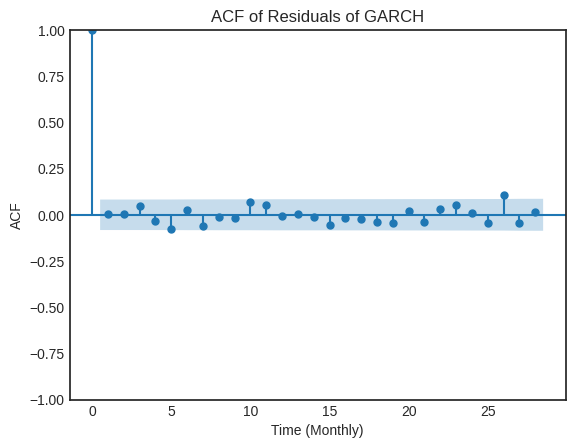

In [ ]:
plt.figure(figsize=(15,6))
plot_acf(garch_model.resid[12:]);
plt.title('ACF of Residuals of GARCH')
plt.xlabel('Time (Monthly)')
plt.ylabel('ACF')
#plt.savefig("ACF_GARCH_Resid.png")
#files.download("ACF_GARCH_Resid.png")

Text(0, 0.5, 'PACF')

<Figure size 1500x600 with 0 Axes>

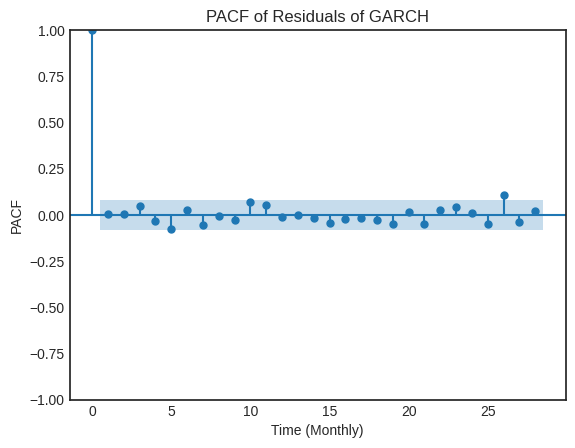

In [ ]:
plt.figure(figsize=(15,6))
plot_pacf(garch_model.resid[12:]);
plt.title('PACF of Residuals of GARCH')
plt.xlabel('Time (Monthly)')
plt.ylabel('PACF')
#plt.savefig("PACF_GARCH_Resid.png")
#files.download("PACF_GARCH_Resid.png")

Most of the spikes of the ACF and PACF are in between the bands, which indicate that the residuals of the GARCH model should be white noise. 

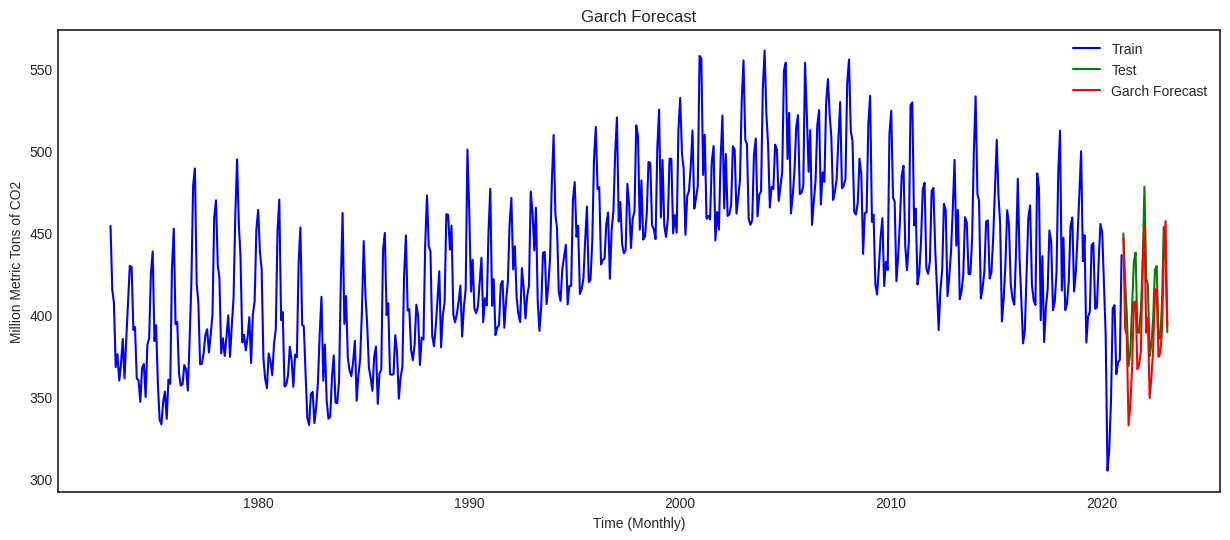

In [ ]:
plt.figure(figsize = (15, 6))
plt.plot(train_co2['Total'], label = 'Train', color ='b')
plt.plot(test_co2['Total'], label = 'Test', color ='g')
plt.plot(prediction, label = 'Garch Forecast', color = 'r')
#plt.fill_between(fcast_garch.index, fcast_garch.lower, fcast_garch.upper, color = 'grey', alpha = .2)
plt.title('Garch Forecast')
plt.xlabel('Time (Monthly)')
plt.ylabel('Million Metric Tons of CO2')
plt.legend() 
#plt.savefig("GARCH_model_FC.png")
#files.download("GARCH_model_FC.png")

The forecast of the GARCH model is pretty similar to the previous Seasonal ARIMA model, capturing the overall pattern well. However, it also tends to be lower than the testing set and its amplitude tends to be larger.

In [ ]:
# Calculate the RMSE for the GARCH model
co2_garch_RMSE = np.sqrt(mean_squared_error(test_co2['Total'], prediction))

print('RMSE for the GARCH model is:', co2_garch_RMSE )

RMSE for the GARCH model is: 22.395259969487515


RMSE of the GARCH model is lower than the Seasonal ARIMA model, indicating that the GARCH model does a better job. 

# Var

In [11]:
Combine = energy[['Total']]
Combine['Co2'] = co2['Total']
Combine

Total      Co2
Month                         
1973-01-01   8911.276  454.077
1973-02-01   8101.170  415.098
1973-03-01   8081.533  407.423
1973-04-01   7413.508  368.205
1973-05-01   7626.389  376.028
...               ...      ...
2022-10-01  10595.157  385.423
2022-11-01  11152.339  407.569
2022-12-01  12313.024  453.446
2023-01-01  11992.781  434.361
2023-02-01  10767.779  389.442

[602 rows x 2 columns]

Text(0, 0.5, 'Million Metric Tons of CO2')

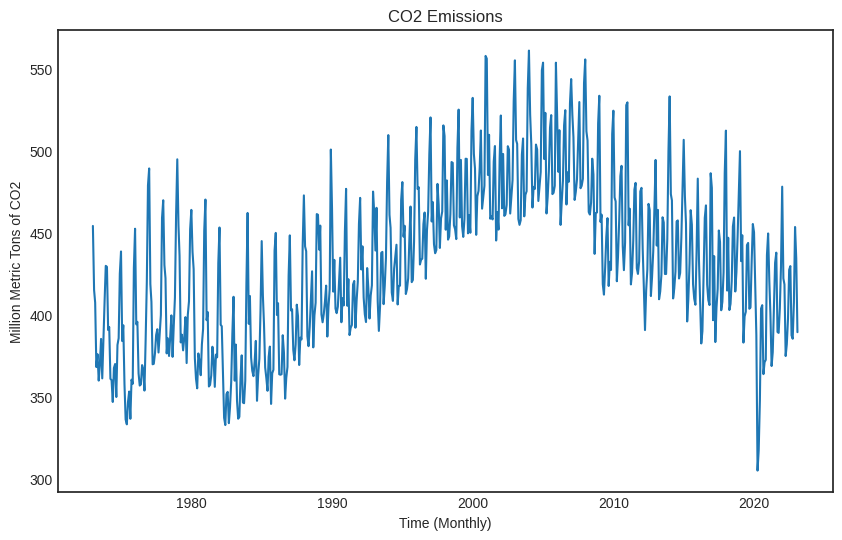

In [12]:
plt.figure(figsize=(10,6))
plt.plot(co2['Total'])
plt.title('CO2 Emissions')
plt.xlabel('Time (Monthly)')
plt.ylabel('Million Metric Tons of CO2')

Text(0, 0.5, 'Quadrillion BTU')

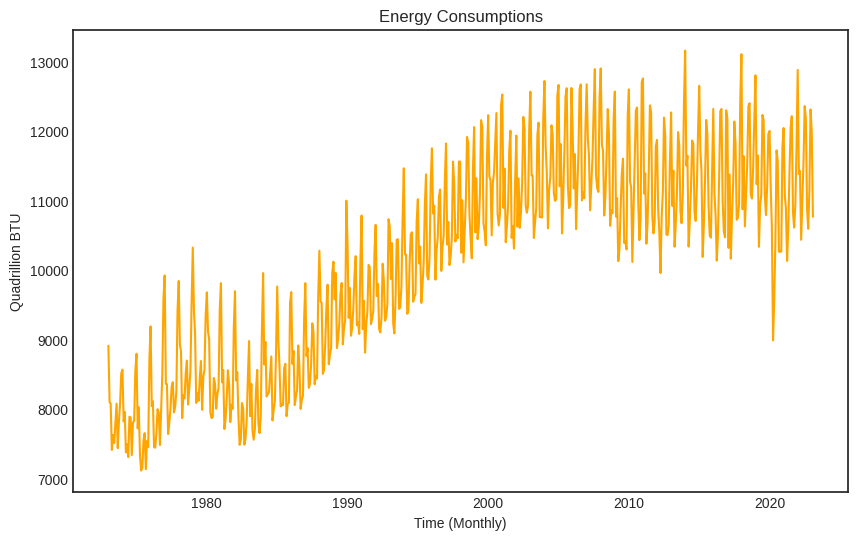

In [13]:
plt.figure(figsize=(10,6))
plt.plot(energy['Total'], color = 'orange')
plt.title('Energy Consumptions')
plt.xlabel('Time (Monthly)')
plt.ylabel('Quadrillion BTU')

In [14]:
np.corrcoef(Combine['Total'],Combine['Co2'])

array([[1.        , 0.83287714],
       [0.83287714, 1.        ]])

As CO2 Emissions and energy consumption have similar movement over time, plus their high correlation at 0.83, we tried to build VAR model that include energy consumption as one of the indpendent variables.

In [15]:
### adf test, stationary check

adf1 = adfuller(Combine["Total"])[1]
print(f"p value:{adf1}", ", Series is Stationary" if adf1 <0.05 else ", Series is Non-Stationary.")

p value:0.489469512068205 , Series is Non-Stationary.


In [16]:
adf2 = adfuller(Combine["Co2"])[1]
print(f"p value:{adf2}", ", Series is Stationary" if adf2 <0.05 else ", Series is Non-Stationary.")

p value:0.41838473867698245 , Series is Non-Stationary.


In [17]:
Combine1 = Combine.diff()
Combine1 = Combine1.dropna()
Combine1

Total     Co2
Month                       
1973-02-01  -810.106 -38.979
1973-03-01   -19.637  -7.675
1973-04-01  -668.025 -39.218
1973-05-01   212.881   7.823
1973-06-01  -113.363 -16.045
...              ...     ...
2022-10-01  -288.652  -2.072
2022-11-01   557.182  22.146
2022-12-01  1160.685  45.877
2023-01-01  -320.243 -19.085
2023-02-01 -1225.002 -44.919

[601 rows x 2 columns]

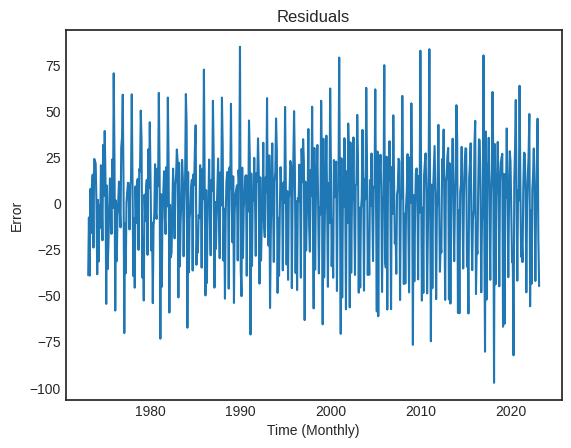

In [33]:
plt.plot(Combine1['Co2'])
plt.title('Residuals')
plt.xlabel('Time (Monthly)')
plt.ylabel('Error')
plt.legend()

Before running the model, we checked for stationary by appying adf test and found that both series are non-stationary, so we used first differencing to transform our data.

In [21]:
## train-test split
split_date = '2021-01-01'

train = Combine1.loc[Combine1.index < split_date]

test = Combine1.loc[Combine1.index >= split_date]
train

Total     Co2
Month                       
1973-02-01  -810.106 -38.979
1973-03-01   -19.637  -7.675
1973-04-01  -668.025 -39.218
1973-05-01   212.881   7.823
1973-06-01  -113.363 -16.045
...              ...     ...
2020-08-01  -154.502   2.080
2020-09-01 -1302.619 -41.959
2020-10-01    -2.215   7.222
2020-11-01     4.283   1.487
2020-12-01  1503.395  63.725

[575 rows x 2 columns]

We again separated the data into train and test set, by assigning the last two years to be the test set.

In [22]:
## Try auto function
model = VAR(train)

results = model.fit(maxlags=15, ic='aic')
results.summary() 

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 09, Jun, 2023
Time:                     21:08:54
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    14.2121
Nobs:                     561.000    HQIC:                   13.9392
Log likelihood:          -5394.97    FPE:                    950375.
AIC:                      13.7644    Det(Omega_mle):         859244.
--------------------------------------------------------------------
Results for equation Total
               coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------
const            13.478110        14.890473            0.905           0.365
L1.Total         -0.418933         0.172821           -2.424           0.015
L1.Co2           -1.155287         3.616896           -0.319           0.749

In [23]:
model = VAR(train)

results = model.fit(4)
results.summary()
#model.select_order(15)

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 09, Jun, 2023
Time:                     21:08:54
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    15.8315
Nobs:                     571.000    HQIC:                   15.7480
Log likelihood:          -6083.21    FPE:                6.54687e+06
AIC:                      15.6945    Det(Omega_mle):     6.34527e+06
--------------------------------------------------------------------
Results for equation Total
              coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------
const           22.118218        21.143647            1.046           0.296
L1.Total        -1.072217         0.178690           -6.000           0.000
L1.Co2          15.271876         3.961407            3.855           0.000
L2.T

Firstly,when we applied VAR select_order function, it suggested the lag of 14 based on lowest RMSE. However, we found that the model experienced overfitting problem when we do out-of-sample validation. Thus, we again chose the appropriate lags based on the RMSE criterion, and we found that the lag of 4 has the lowest RMSE, so we finally fit the model with lag 4 

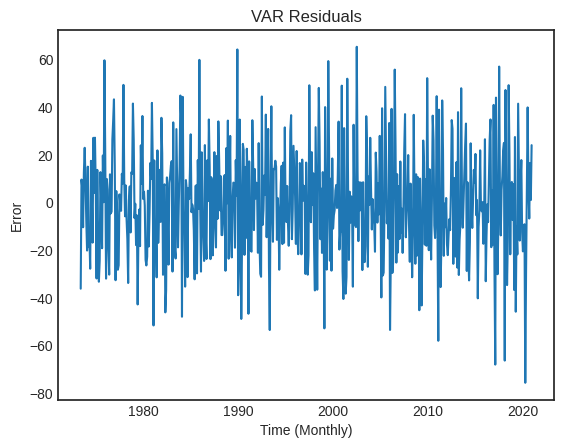

In [31]:
#residual plot
plt.plot(results.resid['Co2'])
#plt.savefig("var_resid.png")
#files.download("var_resid.png")
plt.title('VAR Residuals')
plt.xlabel('Time (Monthly)')
plt.ylabel('Error')
plt.legend()

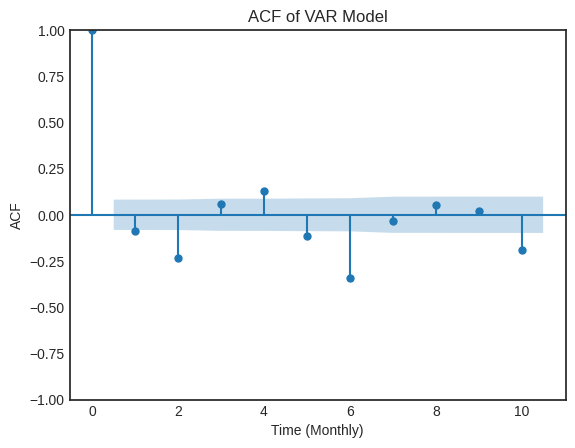

In [32]:
plot_acf(results.resid['Co2'], lags = 10);
plt.title('ACF of VAR Model')
plt.xlabel('Time (Monthly)')
plt.ylabel('ACF')
plt.legend()

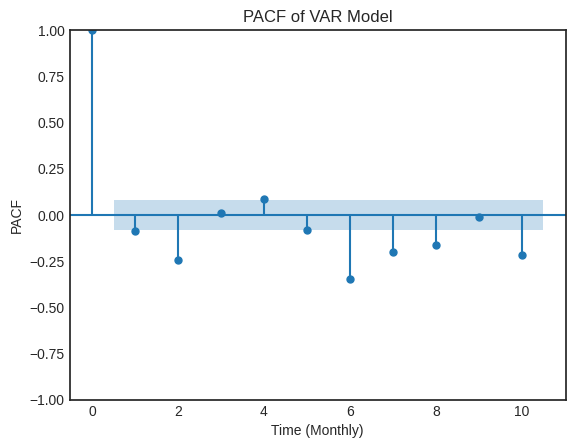

In [64]:
plot_pacf(results.resid['Co2'], lags = 10);
plt.title('PACF of VAR Model')
plt.xlabel('Time (Monthly)')
plt.ylabel('PACF')
plt.legend()

The residual plot after fitting the model looks very similar to white-noise although there are a few spikes out of the interval band. This is because we didn't put the far lags in our model since we have to balance overfitting problem. The ACF and PACF confirm this too.

In [ ]:
####Casaulity test
results.test_causality('Total','Co2', kind='f').summary()

<class 'statsmodels.iolib.table.SimpleTable'>

In [ ]:
####Casaulity test
results.test_causality('Co2','Total', kind='f').summary()

<class 'statsmodels.iolib.table.SimpleTable'>

According to Granger causality test, the p-values are statistically significant in both ways, so energy consumptions can help predict CO2 emissions and vice-versa. However, it can also imply that neither datasets will be beneficial in predicting one another.

In [27]:
pred = results.forecast(results.endog, steps = 26)
df_forecast=pd.DataFrame(data=pred, index=test.index, columns=['energy1d', 'Co21d'])
df_forecast

energy1d      Co21d
Month                            
2021-01-01  261.253050   7.372400
2021-02-01 -634.908619 -26.285290
2021-03-01 -636.348702 -24.787749
2021-04-01 -585.799814 -24.619401
2021-05-01  704.382526  27.164280
2021-06-01  654.552271  23.722450
2021-07-01  169.847621   5.407189
2021-08-01 -383.821284 -14.267988
2021-09-01 -697.948377 -26.178852
2021-10-01  -19.250285   0.681371
2021-11-01  433.276410  16.854609
2021-12-01  503.062341  18.424941
2022-01-01   73.168805   1.763002
2022-02-01 -454.998893 -18.276143
2022-03-01 -385.879179 -14.640081
2022-04-01   -0.895213   0.285256
2022-05-01  387.561832  14.801006
2022-06-01  353.473031  13.056166
2022-07-01  -47.890737  -2.487473
2022-08-01 -327.289053 -12.702622
2022-09-01 -268.988486 -10.078281
2022-10-01   73.511449   3.032070
2022-11-01  312.777066  11.788280
2022-12-01  213.457368   7.557235
2023-01-01  -76.464841  -3.499107
2023-02-01 -265.149941 -10.358885

In [28]:
####Change it to original units

df_forecast['Co2_forecast'] = Combine['Co2'].iloc[-27] + df_forecast['Co21d'].cumsum()
df_forecast['energy_forecast'] = Combine['Total'].iloc[-27] + df_forecast['energy1d'].cumsum()
df_forecast

energy1d      Co21d  Co2_forecast  energy_forecast
Month                                                           
2021-01-01  261.253050   7.372400    443.723400     12033.172050
2021-02-01 -634.908619 -26.285290    417.438110     11398.263431
2021-03-01 -636.348702 -24.787749    392.650361     10761.914730
2021-04-01 -585.799814 -24.619401    368.030961     10176.114915
2021-05-01  704.382526  27.164280    395.195241     10880.497442
2021-06-01  654.552271  23.722450    418.917691     11535.049713
2021-07-01  169.847621   5.407189    424.324880     11704.897334
2021-08-01 -383.821284 -14.267988    410.056892     11321.076050
2021-09-01 -697.948377 -26.178852    383.878040     10623.127673
2021-10-01  -19.250285   0.681371    384.559411     10603.877387
2021-11-01  433.276410  16.854609    401.414020     11037.153797
2021-12-01  503.062341  18.424941    419.838961     11540.216138
2022-01-01   73.168805   1.763002    421.601962     11613.384943
2022-02-01 -454.998893 -18.276143    403.325819     11158.386050
2022-03-01 -385.879179 -14.640081    388.685739     10772.506871
2022-04-01   -0.895213   0.285256    388.970995     10771.611658
2022-05-01  387.561832  14.801006    403.772001     11159.173491
2022-06-01  353.473031  13.056166    416.828167     11512.646522
2022-07-01  -47.890737  -2.487473    414.340694     11464.755785
2022-08-01 -327.289053 -12.702622    401.638073     11137.466732
2022-09-01 -268.988486 -10.078281    391.559792     10868.478246
2022-10-01   73.511449   3.032070    394.591862     10941.989695
2022-11-01  312.777066  11.788280    406.380142     11254.766760
2022-12-01  213.457368   7.557235    413.937376     11468.224128
2023-01-01  -76.464841  -3.499107    410.438270     11391.759288
2023-02-01 -265.149941 -10.358885    400.079385     11126.609347

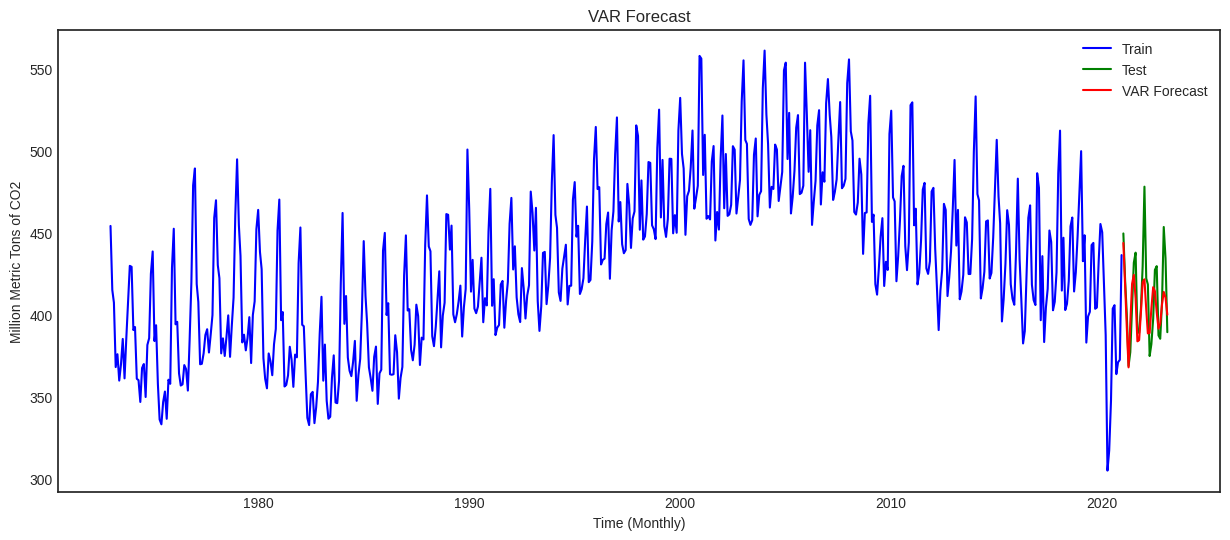

In [29]:
plt.figure(figsize = (15,6))
plt.plot(Combine['Co2'][:-26],label = 'Train', color = 'b')
#plt.plot(train['Total'], label = 'Energy Consumption')
plt.plot(Combine['Co2'][-26:], label = 'Test', color = 'g')
#plt.plot(test['Total'],label = 'test_Energy')
plt.plot(df_forecast['Co2_forecast'], label = 'VAR Forecast', color = 'r')
plt.title('VAR Forecast')
plt.xlabel('Time (Monthly)')
plt.ylabel('Million Metric Tons of CO2')
plt.legend()
#plt.savefig("var.png")
#files.download("var.png")

In [30]:
VAR_RMSE = np.sqrt(mean_squared_error(df_forecast['Co2_forecast'],Combine['Co2'][-26:]))

print('RMSE for the VAR model is:', VAR_RMSE )

RMSE for the VAR model is: 19.96201484664503


From the out-of-sample validation above, we can observe that VAR model can perform very well in capturing all variations of the series in short-term periods, meanwhile the forecast shows mean converting when it goes to very far periods ahead following the AR model concept. Moreover, Var model has the lowest RMSE among every models we tried before at 19.96, so we decided to choose VAR model to be our final prediction. If the VAR model were to be backtested or predict further, the prediction may not show much of an amplitude.

# Combination model

After we applied several models, we tried combining them together in order to improve the accuracy of our prediction. We made a combination model under linear regression scheme, using ETS, ARIMA and Holt-winter models in this combination.

In [57]:
train_1 = train_co2[['Total']]
test_1 = test_co2[['Total']]

best_ets = ets_co2.fittedvalues

train_1['ets'] = ets_co2_damped.fittedvalues
train_1['arima'] = sarima_fitted_co2.fittedvalues
train_1['hw_co2'] = hw_fitted_co2_damped.fittedvalues

test_1['ets'] = ets_co2.forecast(26)
test_1['arima'] = sarima_fitted_co2.forecast(26)
test_1['hw_co2'] = hw_fitted_co2_damped.forecast(26)

In [58]:
comb_model = smf.ols('Total ~ ets + arima + hw_co2', data = train_1[12:]).fit()
comb_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Total   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     3201.
Date:                Fri, 09 Jun 2023   Prob (F-statistic):               0.00
Time:                        21:13:56   Log-Likelihood:                -2188.6
No. Observations:                 564   AIC:                             4385.
Df Residuals:                     560   BIC:                             4403.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.4000      4.426      1.220      0.223      -3.293      14.093
ets           -0.2719      0.353     -0.771      0.441      -0.965       0.421
arima          0.9222      0.113      8.160      0.000       0.700       1.144
hw_co2         0.3372      0.356      0.948      0.344      -0.362       1.036
==============================================================================
Omnibus:                       19.063   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.444
Skew:                          -0.369   Prob(JB):                     1.34e-05
Kurtosis:                       3.641   Cond. No.                     6.76e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.76e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Regarding regression summary table, the combination model assigns a big weight of 0.92 to ARIMA model, while gives just a little weight of 0.3 and -0.2 to Holt-Winter and ETS respectively. Moving to p-values, only ARIMA model that is statistically significant, and the combination model yields high R-Square of 0.94 

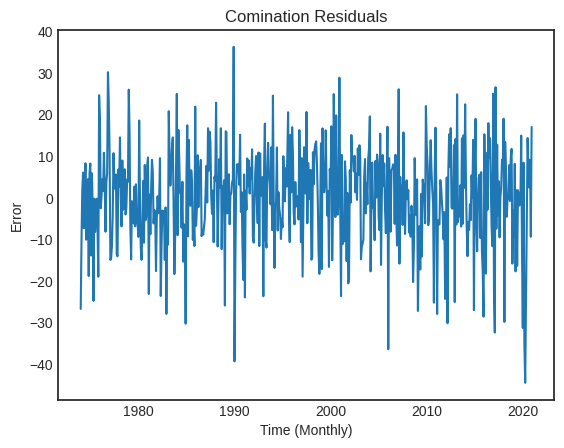

In [60]:
##residual check
plt.plot(comb_model.resid)
plt.title('Comination Residuals')
plt.xlabel('Time (Monthly)')
plt.ylabel('Error')
plt.legend()#plt.savefig("com_res.png")
#files.download("com_res.png")

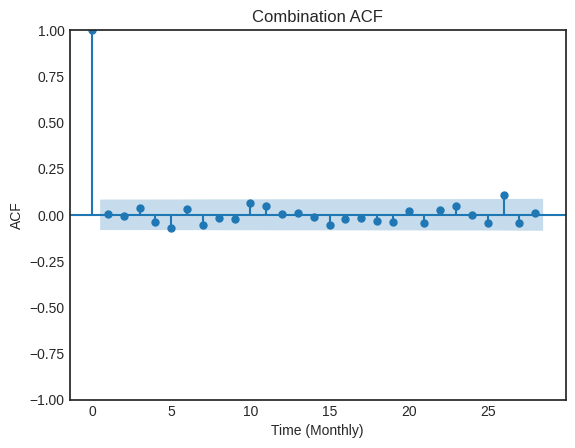

In [63]:
plot_acf(comb_model.resid);
plt.title('Combination ACF')
plt.xlabel('Time (Monthly)')
plt.ylabel('ACF')
plt.legend()

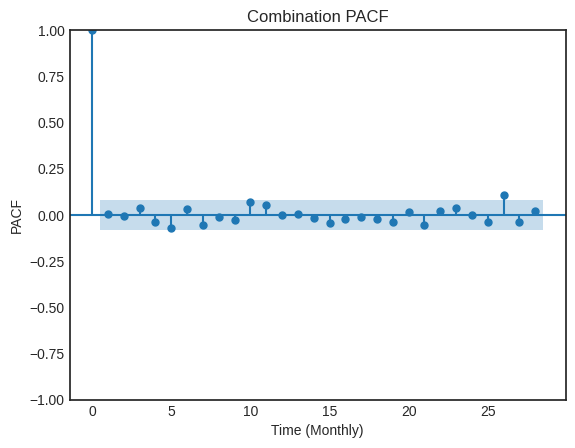

In [62]:
plot_pacf(comb_model.resid);
plt.title('Combination PACF')
plt.xlabel('Time (Monthly)')
plt.ylabel('PACF')
plt.legend()

The residual plot and residual acf and PACF after we fit the model exhibit white-noise pattern, indicating that no room for model improvement.

In [ ]:
comb_forecast1= comb_model.predict(test_1)

comb_RMSE = np.sqrt(mean_squared_error(comb_forecast1,Combine['Co2'][-26:]))

print('RMSE for the combination model is:', comb_RMSE )

RMSE for the combination model is: 20.60982758204141


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

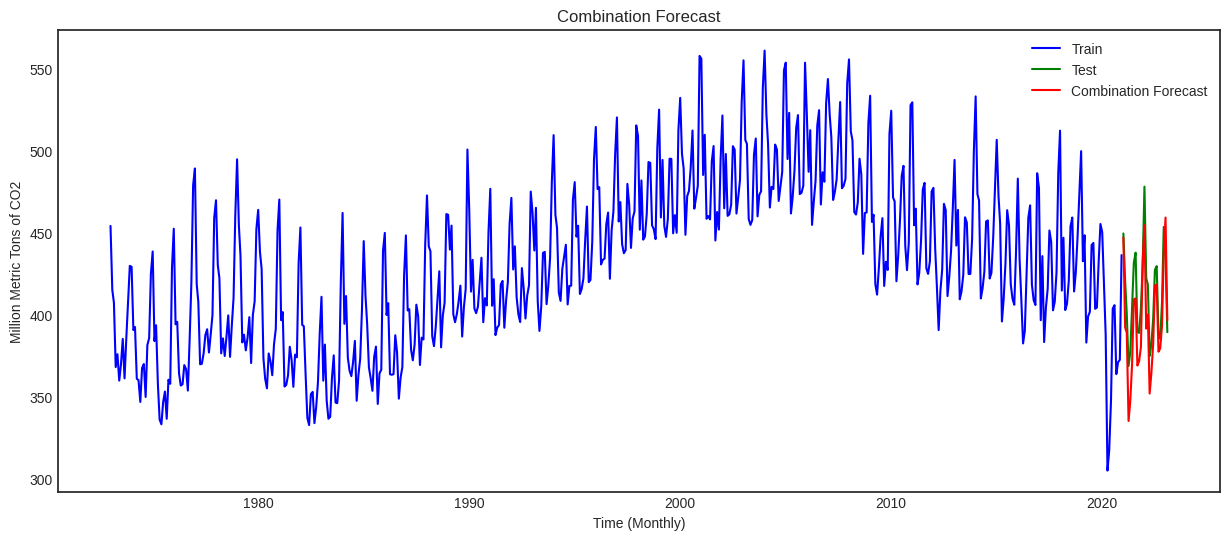

In [ ]:
plt.figure(figsize = (15,6))
plt.plot(train_co2['Total'], label = 'Train', color ='b')
plt.plot(test_co2['Total'], label = 'Test', color ='g')
plt.plot(comb_forecast1, label = 'Combination Forecast', color = 'r')
plt.title('Combination Forecast')
plt.xlabel('Time (Monthly)')
plt.ylabel('Million Metric Tons of CO2')
plt.legend()
plt.savefig("com_forecast.png")
files.download("com_forecast.png")

The combination model has the RMSE of 20.61, which is the second lowest following VAR model. The forecast series shows a big votality over the time, and mostly, the predicted forecst is under the actual value. 

In [ ]:
print('VAR RMSE:', forecast_accuracy(df_forecast['Co2_forecast'],Combine['Co2'][-26:]))
print('\n')
print('Combination RMSE:', forecast_accuracy(comb_forecast1, test_co2['Total']))
print('\n')
print('GARCH RMSE:', forecast_accuracy(prediction, test_co2['Total']))
print('\n')
print('ARIMA RMSE:', forecast_accuracy(arimaTrainPred, test_co2['Total']))
print('\n')
print("Holt-Winters Damped Trend RMSE:", co2_hw_damped_RMSE)
print('\n')
print("ETS Damped Trend RMSE:", co2_ets_damped_RMSE)
print('\n')
print('Box-Cox ETS RMSE:', rmse_ori)

VAR RMSE: {'mape': 0.03609709707845128, 'rmse': 19.96201484664503}


Combination RMSE: {'mape': 0.045328661417329684, 'rmse': 20.60982758204141}


GARCH RMSE: {'mape': 0.04969484665358164, 'rmse': 22.395259969487515}


ARIMA RMSE: {'mape': 0.049996547292966605, 'rmse': 22.523842402334527}


Holt-Winters Damped Trend RMSE: 22.550133938980228


ETS Damped Trend RMSE: 23.58730822705725


Box-Cox ETS RMSE: 29.187865220384655


## Final prediction

## Var

In [ ]:
final_var = VAR(Combine1)

result_final_var = final_var.fit(4)
result_final_var.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 04, Jun, 2023
Time:                     04:57:38
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    15.8502
Nobs:                     597.000    HQIC:                   15.7694
Log likelihood:          -6367.98    FPE:                6.70145e+06
AIC:                      15.7178    Det(Omega_mle):     6.50387e+06
--------------------------------------------------------------------
Results for equation Total
              coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------
const           21.731603        20.573382            1.056           0.291
L1.Total        -1.054937         0.170634           -6.182           0.000
L1.Co2          14.876902         3.798263            3.917           0.000
L2.T

In [ ]:
####1d Forecst(train-test)
pred_var = result_final_var.forecast(result_final_var.endog, steps = 24)
var_forecast1=pd.DataFrame(data=pred_var, index=pd.date_range(start = '2023-03',periods = 24,freq='M'), columns=['energy1d', 'co21d'])
var_forecast1

energy1d      co21d
2023-03-31  -295.747880 -10.822894
2023-04-30   -39.596073  -1.770713
2023-05-31  1168.189926  45.924012
2023-06-30   408.158147  13.929092
2023-07-31  -388.730123 -15.383947
2023-08-31  -635.997667 -23.699998
2023-09-30  -523.658207 -19.908842
2023-10-31   488.360637  19.314016
2023-11-30   618.816238  22.797808
2023-12-31   264.742195   8.968460
2024-01-31  -317.813430 -12.590491
2024-02-29  -621.939565 -23.795140
2024-03-31  -128.821744  -4.230392
2024-04-30   340.910209  13.137715
2024-05-31   490.267105  18.199035
2024-06-30   129.260517   4.245175
2024-07-31  -354.224365 -14.009362
2024-08-31  -383.457268 -14.460828
2024-09-30   -58.438493  -1.963307
2024-10-31   324.655978  12.321213
2024-11-30   344.382067  12.647690
2024-12-31    10.880134  -0.218997
2025-01-31  -281.874638 -11.008851
2025-02-28  -271.690544 -10.254563

In [ ]:
var_forecast1['Co2_forecast'] = Combine['Co2'].iloc[-1] + var_forecast1['co21d'].cumsum()
var_forecast1

energy1d      co21d  Co2_forecast
2023-03-31  -295.747880 -10.822894    378.619106
2023-04-30   -39.596073  -1.770713    376.848392
2023-05-31  1168.189926  45.924012    422.772405
2023-06-30   408.158147  13.929092    436.701496
2023-07-31  -388.730123 -15.383947    421.317550
2023-08-31  -635.997667 -23.699998    397.617551
2023-09-30  -523.658207 -19.908842    377.708709
2023-10-31   488.360637  19.314016    397.022726
2023-11-30   618.816238  22.797808    419.820533
2023-12-31   264.742195   8.968460    428.788994
2024-01-31  -317.813430 -12.590491    416.198503
2024-02-29  -621.939565 -23.795140    392.403363
2024-03-31  -128.821744  -4.230392    388.172970
2024-04-30   340.910209  13.137715    401.310685
2024-05-31   490.267105  18.199035    419.509721
2024-06-30   129.260517   4.245175    423.754896
2024-07-31  -354.224365 -14.009362    409.745534
2024-08-31  -383.457268 -14.460828    395.284706
2024-09-30   -58.438493  -1.963307    393.321399
2024-10-31   324.655978  12.321213    405.642612
2024-11-30   344.382067  12.647690    418.290302
2024-12-31    10.880134  -0.218997    418.071306
2025-01-31  -281.874638 -11.008851    407.062454
2025-02-28  -271.690544 -10.254563    396.807892

In [ ]:
co2['Total']

Month
1973-01-01    454.077
1973-02-01    415.098
1973-03-01    407.423
1973-04-01    368.205
1973-05-01    376.028
               ...   
2022-10-01    385.423
2022-11-01    407.569
2022-12-01    453.446
2023-01-01    434.361
2023-02-01    389.442
Name: Total, Length: 602, dtype: float64

Text(0.5, 1.0, 'VAR model forecast')

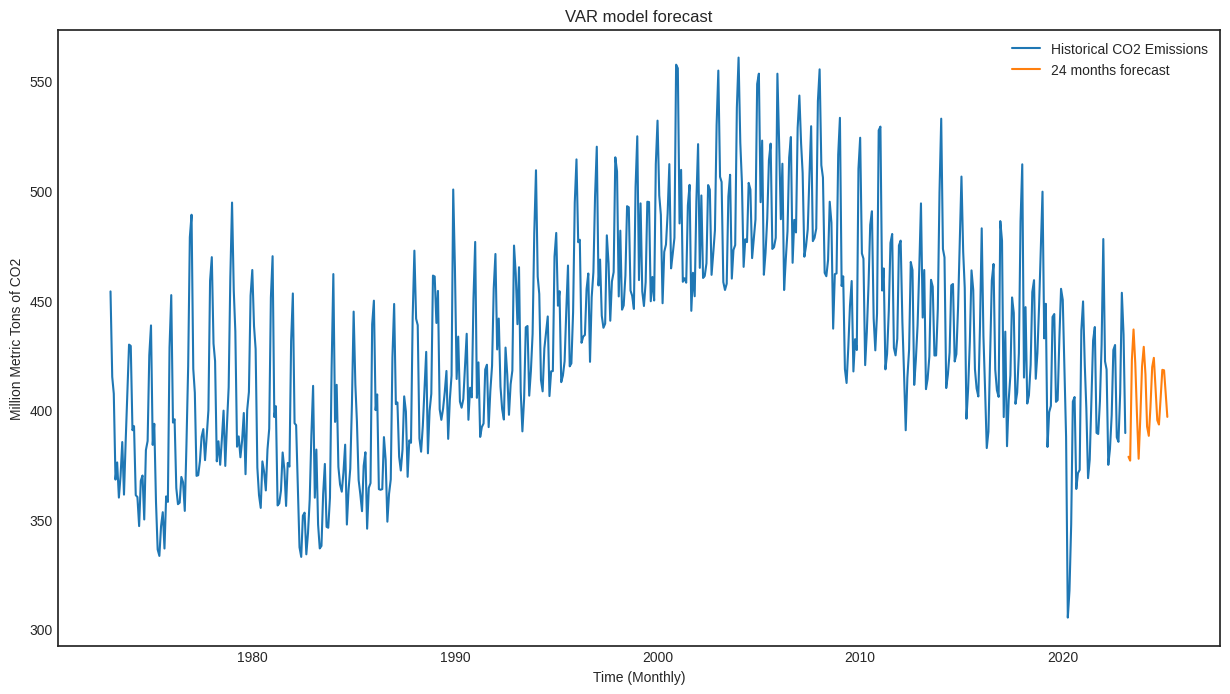

In [ ]:
#### VAR 24 months ahead prediction 
plt.figure(figsize = (15,8))
plt.plot(co2['Total'],label = 'Historical CO2 Emissions')
plt.plot(var_forecast1['Co2_forecast'], label = '24 months forecast')
plt.legend()
plt.xlabel('Time (Monthly)')
plt.ylabel('Million Metric Tons of CO2')
plt.title('VAR model forecast')

The forecast appears to be mean recerting and the amplitude is getting smaller. If we were to extend the forecast or back test, the forecast would most likely become a straight line. While this is the best forecast for our two year window, it may not be good long term.

# Arima

In [ ]:
arima1 = ARIMA(co2['Total'], order=(1, 0, 2), seasonal_order=(2, 1, 2, 12)
              ).fit()
arima1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                            Total   No. Observations:                  602
Model:             ARIMA(1, 0, 2)x(2, 1, 2, 12)   Log Likelihood               -2295.320
Date:                          Sun, 04 Jun 2023   AIC                           4606.640
Time:                                  05:07:45   BIC                           4641.681
Sample:                              01-01-1973   HQIC                          4620.291
                                   - 02-01-2023                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9785      0.010     97.759      0.000       0.959       0.998
ma.L1         -0.3884      0.038    -10.306      0.000      -0.462      -0.315
ma.L2         -0.1455      0.040     -3.675      0.000      -0.223      -0.068
ar.S.L12       0.5581      0.146      3.827      0.000       0.272       0.844
ar.S.L24      -0.2586      0.043     -6.008      0.000      -0.343      -0.174
ma.S.L12      -1.3251      0.148     -8.936      0.000      -1.616      -1.034
ma.S.L24       0.4727      0.127      3.722      0.000       0.224       0.722
sigma2       136.5364      6.904     19.776      0.000     123.004     150.069
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                37.06
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.40   Skew:                            -0.43
Prob(H) (two-sided):                  0.02   Kurtosis:                         3.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
#### 24 periods Forecast arima
forecast_arima = arima1.forecast(24)
forecast_arima

2023-03-01    401.087165
2023-04-01    348.682303
2023-05-01    360.265876
2023-06-01    376.835940
2023-07-01    413.943139
2023-08-01    415.172438
2023-09-01    374.090531
2023-10-01    376.120025
2023-11-01    392.891596
2023-12-01    438.508976
2024-01-01    446.106183
2024-02-01    391.555306
2024-03-01    396.384214
2024-04-01    342.234203
2024-05-01    354.525223
2024-06-01    373.161913
2024-07-01    412.171164
2024-08-01    413.990777
2024-09-01    372.144775
2024-10-01    375.319008
2024-11-01    390.343500
2024-12-01    433.505978
2025-01-01    451.686337
2025-02-01    397.373037
Freq: MS, Name: predicted_mean, dtype: float64

Text(0.5, 1.0, 'ARIMA model forecast')

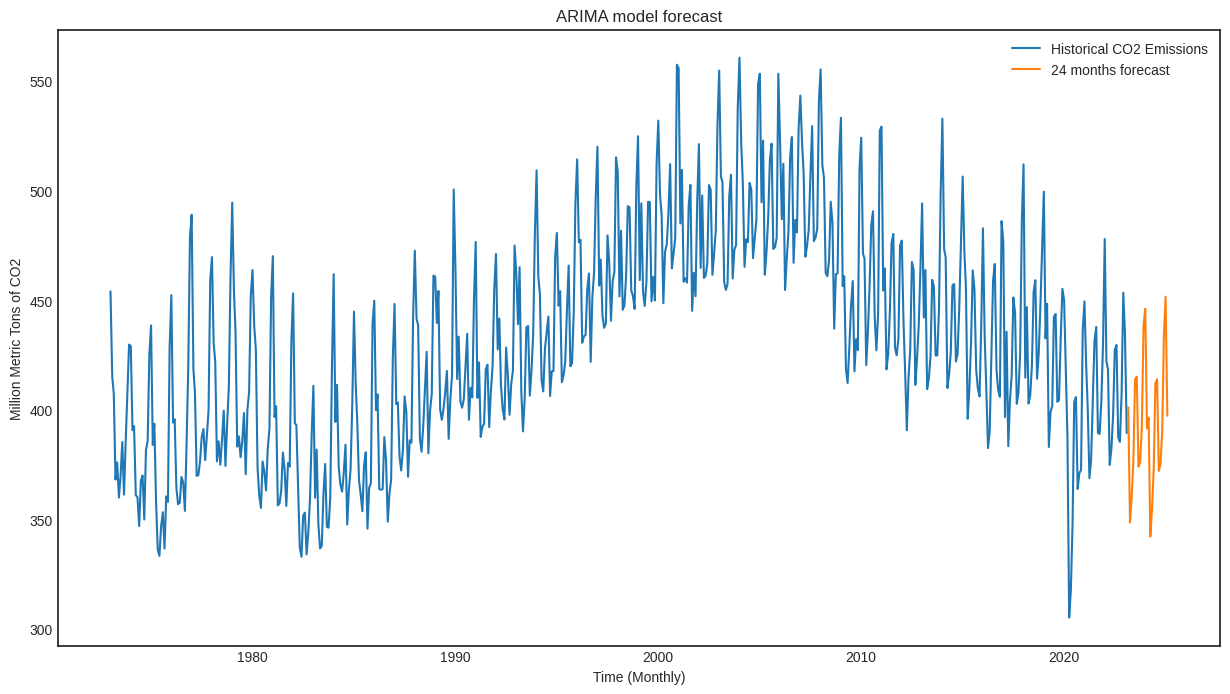

In [ ]:
#### ARIMA 24 months ahead prediction 
plt.figure(figsize = (15,8))
plt.plot(co2['Total'],label = 'Historical CO2 Emissions')
plt.plot(forecast_arima, label = '24 months forecast')
plt.legend()
plt.xlabel('Time (Monthly)')
plt.ylabel('Million Metric Tons of CO2')
plt.title('ARIMA model forecast')

The ARIMA model is increasing in amplitude but remaining strong between 450 million and 350 million metric tons of CO2. The two year forecast does not predict CO2 emissions decreasing that much, which could lead to many more environmental regulations for businesses. 

# Combination

In [ ]:
co2.index.freq = pd.infer_freq(co2.index)

In [ ]:
##fit ets with whole dataset
ets_co2_damped1=sm.tsa.statespace.ExponentialSmoothing(co2['Total'],
                                           trend=True, 
                                           initialization_method= 'heuristic', 
                                           seasonal=12, 
                                           damped_trend=True).fit()

ets_co2_damped1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Exponential Smoothing Results                         
==============================================================================
Dep. Variable:                  Total   No. Observations:                  602
Model:                  ETS(A, Ad, A)   Log Likelihood               -2374.502
Date:                Sun, 04 Jun 2023   AIC                           4759.005
Time:                        05:26:32   BIC                           4781.006
Sample:                    01-01-1973   HQIC                          4767.568
                         - 02-01-2023   Scale                          156.153
Covariance Type:                  opg                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
smoothing_level        0.4107      0.028     14.427      0.000       0.355       0.467
smoothing_trend        0.0001      0.009      0.011      0.991      -0.018       0.018
smoothing_seasonal     0.2180      0.019     11.241      0.000       0.180       0.256
damping_trend          0.9234      0.279      3.306      0.001       0.376       1.471
=============================================
             initialization method: heuristic
---------------------------------------------
level                                392.3283
trend                                 -1.0331
seasonal                              56.3623
seasonal.L1                            8.9871
seasonal.L2                           -6.1429
seasonal.L3                          -33.5739
seasonal.L4                          -15.1059
seasonal.L5                          -20.1978
seasonal.L6                          -31.6808
seasonal.L7                          -29.1929
seasonal.L8                          -21.8482
seasonal.L9                           12.4607
seasonal.L10                          12.1542
seasonal.L11                          67.7780
===================================================================================
Ljung-Box (L1) (Q):                  22.34   Jarque-Bera (JB):                47.64
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.58   Skew:                            -0.53
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
###fit Holt-winter with whole dataset
hw_co2_damped1 = HWES(co2['Total'], seasonal_periods=12, trend='add', seasonal='add', damped = True).fit()
hw_co2_damped1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       ExponentialSmoothing Model Results                       
================================================================================
Dep. Variable:                    Total   No. Observations:                  602
Model:             ExponentialSmoothing   SSE                          93025.803
Optimized:                         True   AIC                           3068.306
Trend:                         Additive   BIC                           3143.110
Seasonal:                      Additive   AICC                          3069.611
Seasonal Periods:                    12   Date:                 Sun, 04 Jun 2023
Box-Cox:                          False   Time:                         05:26:25
Box-Cox Coeff.:                    None                                         
=================================================================================
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.4420484                alpha                 True
smoothing_trend               0.0002746                 beta                 True
smoothing_seasonal            0.1982560                gamma                 True
initial_level                 387.75525                  l.0                 True
initial_trend                 0.2346933                  b.0                 True
damping_trend                 0.9949737                  phi                 True
initial_seasons.0             69.337138                  s.0                 True
initial_seasons.1             22.027010                  s.1                 True
initial_seasons.2             18.976208                  s.2                 True
initial_seasons.3            -20.396744                  s.3                 True
initial_seasons.4            -23.697258                  s.4                 True
initial_seasons.5            -32.884840                  s.5                 True
initial_seasons.6            -22.623719                  s.6                 True
initial_seasons.7            -19.008553                  s.7                 True
initial_seasons.8            -40.426005                  s.8                 True
initial_seasons.9            -15.017838                  s.9                 True
initial_seasons.10            3.8500224                 s.10                 True
initial_seasons.11            55.247361                 s.11                 True
---------------------------------------------------------------------------------
"""

In [ ]:
Meta = smf.ols('Total~ARIMA+Holt + ETS', data=regression[12:]).fit()
Meta.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Total   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     3230.
Date:                Sun, 04 Jun 2023   Prob (F-statistic):               0.00
Time:                        05:28:29   Log-Likelihood:                -2293.0
No. Observations:                 590   AIC:                             4594.
Df Residuals:                     586   BIC:                             4611.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.1948      4.370      1.417      0.157      -2.389      14.778
ARIMA          0.9034      0.113      7.990      0.000       0.681       1.125
Holt           0.3835      0.320      1.197      0.232      -0.246       1.013
ETS           -0.3015      0.319     -0.945      0.345      -0.928       0.325
==============================================================================
Omnibus:                       24.674   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.163
Skew:                          -0.405   Prob(JB):                     1.71e-07
Kurtosis:                       3.782   Cond. No.                     6.77e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
meta_forecast = pd.DataFrame(data = arima1.forecast(24).values, index = pd.date_range(start ='2023-03-01',periods = 24,freq = 'M'),columns =['ARIMA'])
meta_forecast['Holt'] = hw_co2_damped1.forecast(24).values
meta_forecast['ETS'] = ets_co2_damped1.forecast(24).values
meta_forecast

ARIMA        Holt         ETS
2023-03-31  401.087165  392.227980  392.736627
2023-04-30  348.682303  344.333182  344.505589
2023-05-31  360.265876  356.558713  356.241565
2023-06-30  376.835940  377.318109  376.973736
2023-07-31  413.943139  413.227467  413.013010
2023-08-31  415.172438  415.450632  415.627399
2023-09-30  374.090531  371.321712  371.771265
2023-10-31  376.120025  372.183038  372.751298
2023-11-30  392.891596  386.515703  387.563077
2023-12-31  438.508976  428.158748  428.971934
2024-01-31  446.106183  442.499638  442.701645
2024-02-29  391.555306  396.212047  394.460484
2024-03-31  396.384214  392.196410  392.709005
2024-04-30  342.234203  344.301770  344.480084
2024-05-31  354.525223  356.527459  356.218014
2024-06-30  373.161913  377.287012  376.951990
2024-07-31  412.171164  413.196526  412.992932
2024-08-31  413.990777  415.419847  415.608859
2024-09-30  372.144775  371.291082  371.754146
2024-10-31  375.319008  372.152562  372.735491
2024-11-30  390.343500  386.485380  387.548481
2024-12-31  433.505978  428.128578  428.958457
2025-01-31  451.686337  442.469619  442.689201
2025-02-28  397.373037  396.182178  394.448994

In [ ]:
Meta_pred = Meta.predict(meta_forecast)
Meta_pred

2023-03-31    400.568352
2023-04-30    349.397168
2023-05-31    361.012550
2023-06-30    377.693691
2023-07-31    414.123749
2023-08-31    415.298807
2023-09-30    374.482037
2023-10-31    376.350349
2023-11-30    392.533394
2023-12-31    437.231739
2024-01-31    445.456213
2024-02-29    392.965840
2024-03-31    396.316025
2024-04-30    343.567734
2024-05-31    355.821679
2024-06-30    374.369282
2024-07-31    412.517170
2024-08-31    414.225102
2024-09-30    372.717697
2024-10-31    375.619805
2024-11-30    390.224268
2024-12-31    432.704630
2025-01-31    450.489442
2025-02-28    398.213462
dtype: float64

Text(0.5, 1.0, 'Meta model forecast')

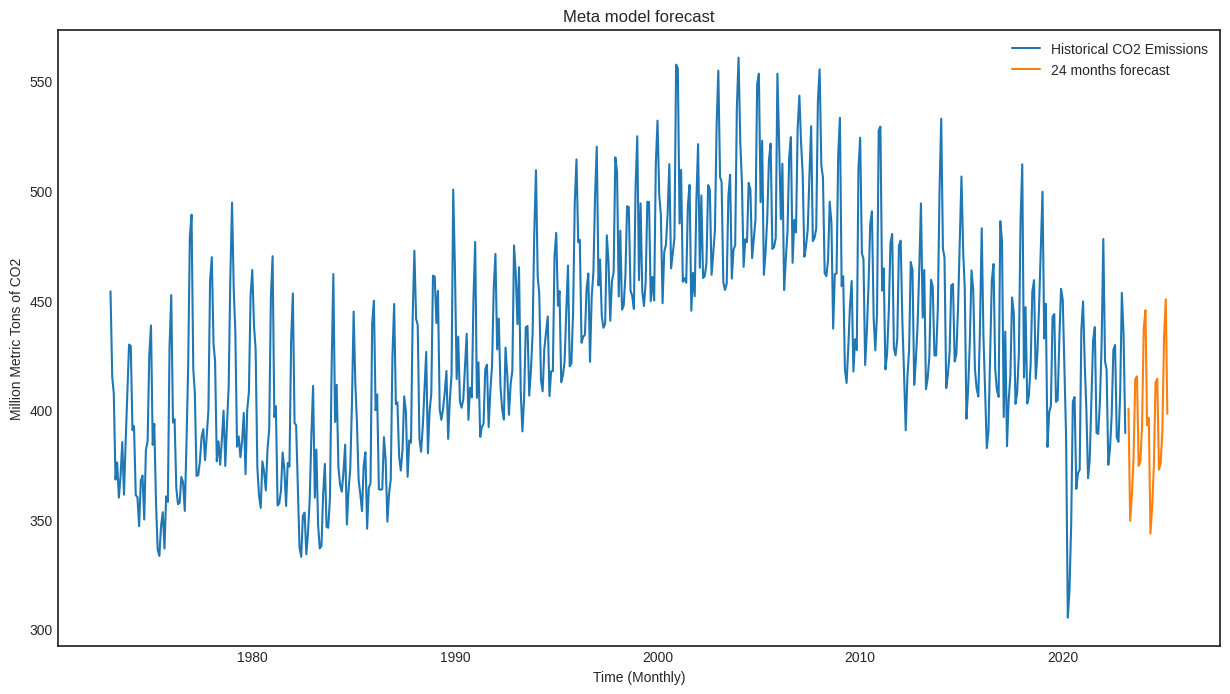

In [ ]:
#### Meta 24 months ahead prediction 
plt.figure(figsize = (15,8))
plt.plot(co2['Total'],label = 'Historical CO2 Emissions')
plt.plot(Meta_pred, label = '24 months forecast')
plt.legend()
plt.xlabel('Time (Monthly)')
plt.ylabel('Million Metric Tons of CO2')
plt.title('Meta model forecast')

The combination plot looks very close to the arima model. The betas of the combination model indicate the ARIMA model holds the most weight in predicting the forecast. The combination model resembling the ARIMA model makes sense in this way. The variance is increasing slightly and it does not appear CO2 emissions will be decreasing in the next two years. This is very bad for the earth's environment.

## Garch

In [ ]:
arima1_residuals = arima1.resid


garch1 = arch_model(arima1_residuals, p=1, q=1).fit()
#garch_model = garch.fit()

# Use ARIMA to predict mu
predicted_mu1 = arima1.forecast(24)
# Use GARCH to predict the residual
garch_forecast1 = garch1.forecast(horizon = 24, reindex = False)
predicted_et1 = garch_forecast1.mean.values[0] #['h.26']#.iloc[-1]
# Combine both models' output: yt = mu + et
prediction1 = predicted_mu1 + predicted_et1
prediction1

Iteration:      1,   Func. Count:      6,   Neg. LLF: 18241.890043242183
Iteration:      2,   Func. Count:     12,   Neg. LLF: 160855551484.1156
Iteration:      3,   Func. Count:     20,   Neg. LLF: 2815.363009329666
Iteration:      4,   Func. Count:     26,   Neg. LLF: 3436.2359581372248
Iteration:      5,   Func. Count:     32,   Neg. LLF: 3448.073426959879
Iteration:      6,   Func. Count:     38,   Neg. LLF: 2500.071769932342
Iteration:      7,   Func. Count:     44,   Neg. LLF: 4592.00988123346
Iteration:      8,   Func. Count:     50,   Neg. LLF: 4391.5799656912695
Iteration:      9,   Func. Count:     56,   Neg. LLF: 4174.733937676709
Iteration:     10,   Func. Count:     62,   Neg. LLF: 3943.805939925724
Iteration:     11,   Func. Count:     68,   Neg. LLF: 3740.5908823088507
Iteration:     12,   Func. Count:     74,   Neg. LLF: 2489.893862654464
Iteration:     13,   Func. Count:     80,   Neg. LLF: 4189.074069515826
Iteration:     14,   Func. Count:     86,   Neg. LLF: 2410.31

2023-03-01    401.151426
2023-04-01    348.746563
2023-05-01    360.330137
2023-06-01    376.900201
2023-07-01    414.007399
2023-08-01    415.236698
2023-09-01    374.154791
2023-10-01    376.184285
2023-11-01    392.955857
2023-12-01    438.573237
2024-01-01    446.170444
2024-02-01    391.619566
2024-03-01    396.448474
2024-04-01    342.298463
2024-05-01    354.589483
2024-06-01    373.226173
2024-07-01    412.235424
2024-08-01    414.055038
2024-09-01    372.209036
2024-10-01    375.383268
2024-11-01    390.407760
2024-12-01    433.570239
2025-01-01    451.750598
2025-02-01    397.437298
Freq: MS, Name: predicted_mean, dtype: float64

Text(0.5, 1.0, 'GARCH model forecast')

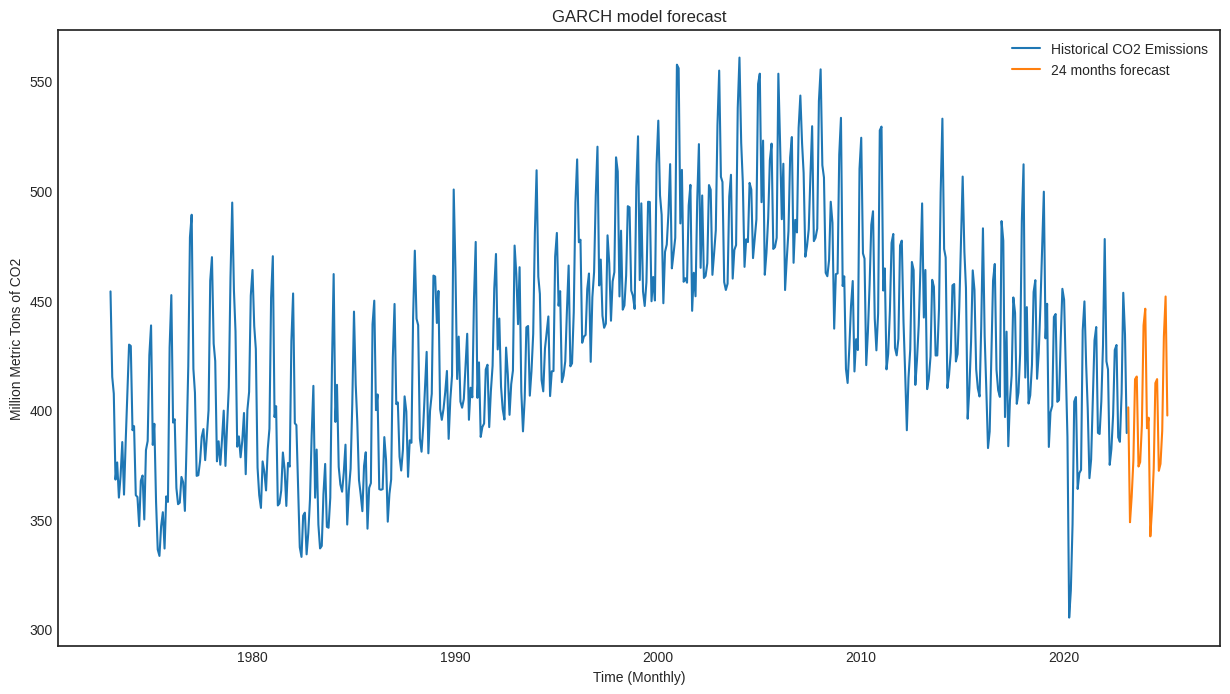

In [ ]:
#### GARCH 24 months ahead prediction 
plt.figure(figsize = (15,8))
plt.plot(co2['Total'],label = 'Historical CO2 Emissions')
plt.plot(prediction1, label = '24 months forecast')
plt.legend()
plt.xlabel('Time (Monthly)')
plt.ylabel('Million Metric Tons of CO2')
plt.title('GARCH model forecast')

Since GARCh utilitzes ARIMA to help forecast, it also resembles the ARIMA forecast. The variance appears to be increasing in amplitude and the CO2 emissions do not appear to be decreasing but possibly increasing slightly.

Text(0.5, 1.0, 'GARCH model forecast')

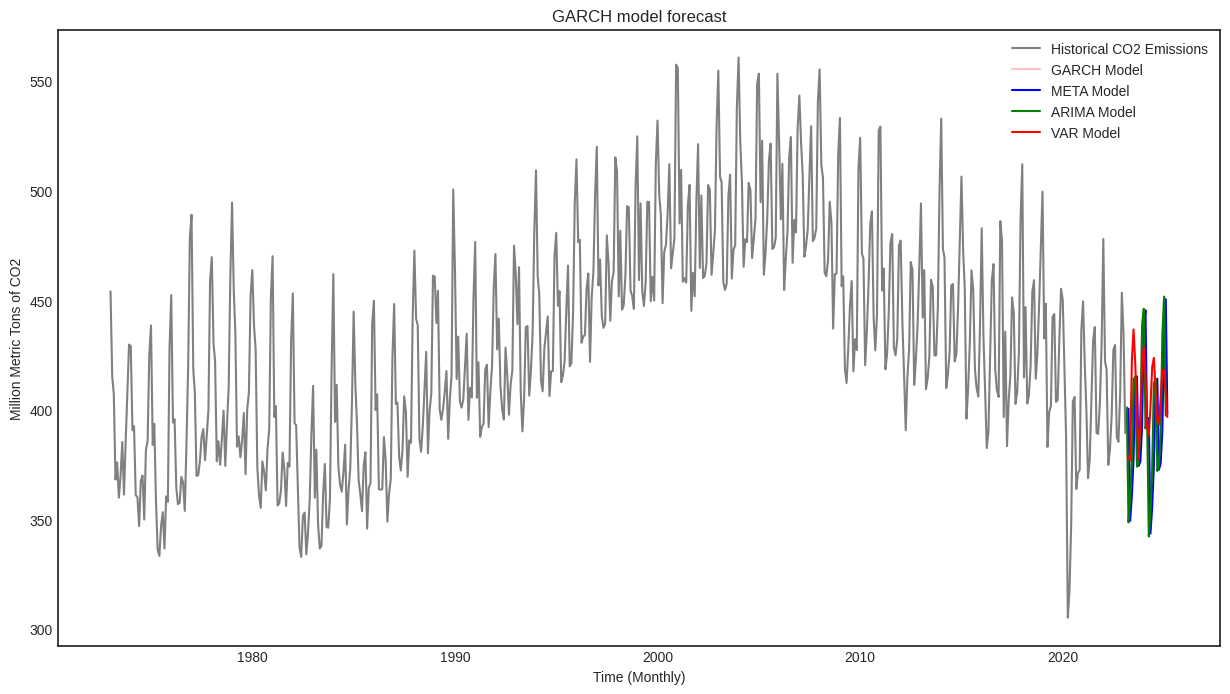

In [ ]:
#### plot of all Models 24 months forecast
plt.figure(figsize = (15,8))
plt.plot(co2['Total'],label = 'Historical CO2 Emissions', color = 'grey')
plt.plot(prediction1, label = 'GARCH Model',color = 'pink')
plt.plot(Meta_pred, label = 'META Model', color = 'b')
plt.plot(forecast_arima, label = 'ARIMA Model', color = 'green')
plt.plot(var_forecast1['Co2_forecast'], label = 'VAR Model',color = 'red')
plt.legend()
plt.xlabel('Time (Monthly)')
plt.ylabel('Million Metric Tons of CO2')
plt.title('GARCH model forecast')

This is a plot of all the forecasts for the next two years together. The VAR model can be seen easily in red resembling its mean reverting forecast. The other models, which either use ARIMA or heavily favor it, predict almost the same forecast for the next two years.

# Conclusion



We run several models, such as ETS, ETS with Box-Cox transofrmed data, Holt-Winter with Damped Trend, ARIMA, GARCH, VAR, and a combination of models in a multiple linear regression. We found that the best model - as per RMSE - to forecast CO2 emissions is the VAR model of order 4. As a matter of fact, there is a mutual correlation between CO2 values and total energy consumption. This has been tested with Granger Causality test, which returned a p-value making H0 rejectable, but for both energy predicting CO2 and CO2 predicting energy movements. This means that there is a chance energy consumption helps to predict CO2 emissions, but the more likely answer is that the pair of them do not help predict either one of each other. In the future we hope to breakdown our forecasts by sectors. We totaled together CO2 emissions and energy consumption from five sectors: residential, industrial, transportaion, commercial and the electric power sector to see which sector is doing the most damage. From these forecasts, and our work, we can see that CO2 emissions are most likely not going to decrease that much. This means that environmental regulations are most likely going to be enforced and could be more rigid than before. It may be best to invest in companies that will not be affected by these regulations or are investing in being net zero already.
